# Business Problem Overview
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

- For many incumbent operators, retaining high profitable customers is the number one business goal.

 

- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [200]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler


In [201]:
data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [202]:
data.shape

(99999, 226)

In [203]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# Derive Churn 

In [204]:
data['month_9_summ'] = data['total_ic_mou_9']+data['total_og_mou_9']+data['vol_2g_mb_9']+data['vol_3g_mb_9']
data['month_9_summ'].head()

0      0.00
1    260.15
2    651.10
3    667.92
4    309.90
Name: month_9_summ, dtype: float64

In [205]:
data['churn'] = data['month_9_summ'].apply(lambda x : 1 if x==0 else 0)

In [206]:
data['churn'].head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [207]:
(data['churn'].value_counts()[0]/data.shape[0])*100

89.8088980889809

- 1. We are having highly imbalanced data set(90:10) after train test split operation

In [208]:
data.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','month_9_summ'],axis=1,inplace=True)
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/20

In [209]:
cols_9th_month = []
#cols_date = []
cols_rech = []

for i in data.columns:
    for c in i.split('_'):
        if c== '9':
            cols_9th_month.append(i)


        #elif c=='date':
            #cols_date.append(i)

In [210]:
print(cols_9th_month)
len(cols_9th_month)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


50

In [211]:
data.drop(cols_9th_month,axis=1,inplace=True)

In [212]:
#cols
for i in data.columns:
    for c in i.split('_'):
        
        if c=='rech' or c=='arpu':
            cols_rech.append(i)
cols_rech

['arpu_6',
 'arpu_7',
 'arpu_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

In [213]:
data[cols_rech].head()

,arpu_6,arpu_7,arpu_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
0,197.385,214.816,213.803,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,212.17,212.17,212.17,212.17,212.17,212.17
1,34.047,355.074,268.321,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2014,NaN,7/25/2014,8/10/2014,NaN,1.0,2.0,NaN,154.0,25.0,NaN,1.0,2.0,NaN,0.0,0.0,NaN,154.0,50.0,NaN,0.00,0.00,NaN,28.61,7.60
2,167.690,189.058,210.226,5,4,2,168,315,116,86,200,86,6/17/2014,7/24/2014,8/14/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,221.338,251.102,508.054,10,11,18,230,310,601,60,50,50,6/28/2014,7/31/2014,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261.636,309.876,238.174,5,6,3,196,350,287,56,110,110,6/26/2014,7/28/2014,8/9/2014,6/4/2014,NaN,NaN,1.0,NaN,NaN,56.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,56.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN


In [214]:
# filling NaN with 0 
data[cols_rech] = data[cols_rech].fillna(0)

In [215]:
cols_date = ['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8']

In [216]:
data['last_date_of_month_6'] = data['last_date_of_month_6'].fillna('6/30/2014')
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna('7/31/2014')
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna('8/31/2014')


In [217]:
# Let's handle mou columns 

cols_mou = []

for i in data.columns:
    for c in i.split('_'):
        if c=='mou':
            cols_mou.append(i)

In [218]:
#cols_mou
print(len(cols_mou))

90


In [219]:
# filling NaN with 0 
data[cols_mou]=data[cols_mou].fillna(0)

In [220]:
#for i in cols_mou:
 #   print(data[i].value_counts())

#check_data = data[cols_mou]
#check_data.head()

In [221]:
data[cols_mou]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.0
1,0.0,0.0,0.0,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.00,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,4.68,23.43,12.76,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0
2,0.0,0.0,0.0,11.54,55.24,37.26,143.33,220.59,208.36,0.0,0.00,0.00,0.0,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.00,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,0.0,0.0,0.0,47.64,108.68,120.94,0.00,0.0,0.0,46.56,236.84,96.84,155.33,412.94,285.46,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,0.0,0.0,0.0,139.33,306.66,239.03,370.04,519.53,395.03,0.21,0.0,0.0,0.00,0.85,0.0
3,0.0,0.0,0.0,99.91,54.39,310.98,123.31,109.01,71.68,0.0,54.86,44.38,0.0,28.09,39.04,73.68,34.81,10.61,107.43,83.21,22.46,1.91,0.65,4.91,0.00,0.00,0.00,183.03,118.68,37.99,26.23,14.89,289.58,2.99,1.73,6.53,0.00,0.00,0.00,0.0,0.0,0.0,29.23,16.63,296.11,0.00,0.0,0.0,10.96,0.00,18.09,223.23,135.31,352.21,62.08,19.98,8.04,113.96,64.51,20.28,57.43,27.09,19.84,233.48,111.59,48.18,43.48,66.44,0.00,1.33,38.56,4.94,1.18,0.00,0.00,0.0,0.0,0.0,45.99,105.01,4.94,280.08,216.61,53.13,0.59,0.0,0.0,0.00,0.00,0.0
4,0.0,0.0,0.0,50.31,149.44,83.89,76.96,91.88,124.26,0.0,0.00,0.00,0.0,0.00,0.00,50.31,149.44,83.89,67.64,91.88,124.26,0.00,0.00,0.00,0.00,0.00,0.00,117.96,241.33,208.16,0.00,0.00,0.00,9.31,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,9.31,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,127.28,241.33,208.16,105.68,88.49,233.81,106.84,109.54,104.13,1.50,0.00,0.00,214.03,198.04,337.94,0.00,0.00,0.86,1.93,0.25,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.93,0.25,0.86,216.44,198.29,338.81,0.00,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [222]:
#check_data.fillna(0)
#data[cols_mou].head()

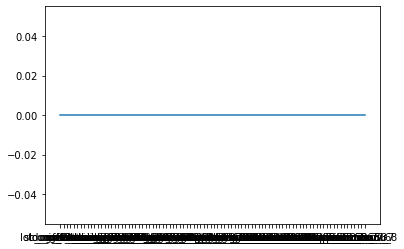

In [223]:
# Lets check again how may columns still have empty entries 
plt.plot((data[cols_mou].isnull().sum()/data.shape[0])*100)
plt.show()

In [224]:
#Handling the categorical columns 

cols_cat = ['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']

In [225]:
data[cols_cat] = data[cols_cat].fillna(-1)

# Here we are creating a new category itself for these categorical variables 

In [226]:
#Removing all the Sept month columns from the data 

#data.drop(cols,axis=1,inplace=True)

data.shape

(99999, 173)

In [227]:
data.loc[:,data.isnull().sum()/data.shape[0]>0].columns

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8'],
      dtype='object')

In [228]:
cols_others = ['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8']

data[cols_others] = data[cols_others].fillna(0)

In [229]:
pd.set_option('display.max_rows', 500)

In [230]:
(data.isnull().sum()/data.shape[0])*100

mobile_number               0.0
circle_id                   0.0
loc_og_t2o_mou              0.0
std_og_t2o_mou              0.0
loc_ic_t2o_mou              0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t2m_mou_8            0.0
loc_og_t2f_mou_6            0.0
loc_og_t2f_mou_7            0.0
loc_og_t

In [231]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,3

#data.columns

HV_June = Total_amt_recharge_data_6(Data) + Total_amt_recharge_data_6 
HV_July = Total_amt_recharge_data_7(Data) + Total_amt_recharge_data_7 
Average = avg(HV_june, HV_July) -> 70 percentile 
total_recharge_data_6 = number of data recharges = 5 avg_rech_amt_data_6 = 200 
Total_amt_recharge_data_6 = total_recharge_data_6 * avg_rech_amt_data_6 
Total_amt_recharge_data_6(Data) = 5* 200 = 1000

In [232]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)



In [233]:
#for i in data.columns:
 #   print(i)

In [234]:
# Now we have imputed all the missing values in the data 

#Let's find our High Value Customers from the data 

In [235]:
#data['Total_amt_recharge_data_6'] = data['total_rech_amt_6']*data['avg_rech_amt_data_6']

data['Total_amt_recharge_data_6'] = data['total_rech_data_6']*data['av_rech_amt_data_6']
data['Total_amt_recharge_data_7'] = data['total_rech_data_7']*data['av_rech_amt_data_7']
data['Total_amt_recharge_data_8'] = data['total_rech_data_7']*data['av_rech_amt_data_8']
# don't delete these null value columns earlier do it after this step 

In [236]:
data['HV_June'] = data['Total_amt_recharge_data_6'] + data['total_rech_amt_6']
data['HV_July'] = data['Total_amt_recharge_data_7'] + data['total_rech_amt_7']
data['HV_August'] = data['Total_amt_recharge_data_8'] + data['total_rech_amt_8']

In [237]:
data['Average'] = (data['HV_June'] + data['HV_July'])*0.5

In [238]:
data['Average'].quantile(q=0.70)

478.0

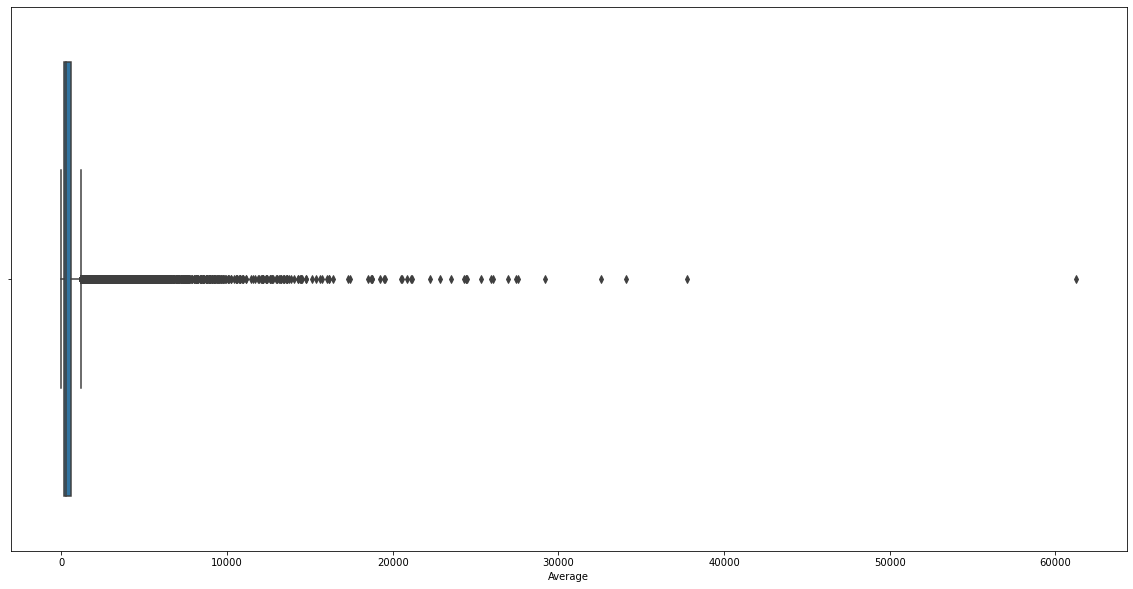

In [239]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Average',data=data)
plt.show()

In [240]:
# Retaining High Value Customers i.e; customers paying more than 70% of the average 

data = data.loc[data['Average']>=data['Average'].quantile(q=0.70),:]

In [241]:
data.shape

(30001, 180)

In [242]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Total_amt_recharge_data_6,Total_amt_recharge_data_7,Total_amt_recharge_data_8,HV_June,HV_July,HV_August,Average
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,614.0,504.0,504.0,559.0
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.

In [243]:
data['Average'].value_counts()

504.0      181
500.0      173
550.0       91
525.0       87
495.0       75
          ... 
13582.5      1
3192.5       1
3565.0       1
2772.0       1
1643.5       1
Name: Average, Length: 5183, dtype: int64

In [244]:
data['Average'].describe()

count    30001.000000
mean      1152.620628
std       1358.713982
min        478.000000
25%        603.000000
50%        800.000000
75%       1208.000000
max      61236.000000
Name: Average, dtype: float64

In [245]:
data.shape

(30001, 180)

In [246]:
data['fb_user_6'].nunique()

3

In [247]:
cols_unique=[]
for i in data.columns:
    uni = data[i].nunique()
    if uni ==1:
        print(i,' : ',uni,' : ',data[i].unique())
        cols_unique.append(i)

circle_id  :  1  :  [109]
loc_og_t2o_mou  :  1  :  [0.]
std_og_t2o_mou  :  1  :  [0.]
loc_ic_t2o_mou  :  1  :  [0.]
last_date_of_month_6  :  1  :  ['6/30/2014']
last_date_of_month_7  :  1  :  ['7/31/2014']
last_date_of_month_8  :  1  :  ['8/31/2014']
std_og_t2c_mou_6  :  1  :  [0.]
std_og_t2c_mou_7  :  1  :  [0.]
std_og_t2c_mou_8  :  1  :  [0.]
std_ic_t2o_mou_6  :  1  :  [0.]
std_ic_t2o_mou_7  :  1  :  [0.]
std_ic_t2o_mou_8  :  1  :  [0.]


In [248]:
cols_unique

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [249]:
# Since these data columns are having 1 value only hence no such info we are getting from these columns 

# but before that For last_date column let's do the Action Phase analysis on the August or 8 th Month 

In [250]:
data['arpu_diff'] = data.arpu_8 - ((data.arpu_6 + data.arpu_7)/2)

data['onnet_mou_diff'] = data.onnet_mou_8 - ((data.onnet_mou_6 + data.onnet_mou_7)/2)

data['offnet_mou_diff'] = data.offnet_mou_8 - ((data.offnet_mou_6 + data.offnet_mou_7)/2)

data['roam_ic_mou_diff'] = data.roam_ic_mou_8 - ((data.roam_ic_mou_6 + data.roam_ic_mou_7)/2)

data['roam_og_mou_diff'] = data.roam_og_mou_8 - ((data.roam_og_mou_6 + data.roam_og_mou_7)/2)

data['loc_og_mou_diff'] = data.loc_og_mou_8 - ((data.loc_og_mou_6 + data.loc_og_mou_7)/2)

data['std_og_mou_diff'] = data.std_og_mou_8 - ((data.std_og_mou_6 + data.std_og_mou_7)/2)

data['isd_og_mou_diff'] = data.isd_og_mou_8 - ((data.isd_og_mou_6 + data.isd_og_mou_7)/2)

data['spl_og_mou_diff'] = data.spl_og_mou_8 - ((data.spl_og_mou_6 + data.spl_og_mou_7)/2)

data['total_og_mou_diff'] = data.total_og_mou_8 - ((data.total_og_mou_6 + data.total_og_mou_7)/2)

data['loc_ic_mou_diff'] = data.loc_ic_mou_8 - ((data.loc_ic_mou_6 + data.loc_ic_mou_7)/2)

data['std_ic_mou_diff'] = data.std_ic_mou_8 - ((data.std_ic_mou_6 + data.std_ic_mou_7)/2)

data['isd_ic_mou_diff'] = data.isd_ic_mou_8 - ((data.isd_ic_mou_6 + data.isd_ic_mou_7)/2)

data['spl_ic_mou_diff'] = data.spl_ic_mou_8 - ((data.spl_ic_mou_6 + data.spl_ic_mou_7)/2)

data['total_ic_mou_diff'] = data.total_ic_mou_8 - ((data.total_ic_mou_6 + data.total_ic_mou_7)/2)

data['total_rech_num_diff'] = data.total_rech_num_8 - ((data.total_rech_num_6 + data.total_rech_num_7)/2)

data['total_rech_amt_diff'] = data.total_rech_amt_8 - ((data.total_rech_amt_6 + data.total_rech_amt_7)/2)

data['max_rech_amt_diff'] = data.max_rech_amt_8 - ((data.max_rech_amt_6 + data.max_rech_amt_7)/2)

data['total_rech_data_diff'] = data.total_rech_data_8 - ((data.total_rech_data_6 + data.total_rech_data_7)/2)

data['max_rech_data_diff'] = data.max_rech_data_8 - ((data.max_rech_data_6 + data.max_rech_data_7)/2)

data['av_rech_amt_data_diff'] = data.av_rech_amt_data_8 - ((data.av_rech_amt_data_6 + data.av_rech_amt_data_7)/2)

data['vol_2g_mb_diff'] = data.vol_2g_mb_8 - ((data.vol_2g_mb_6 + data.vol_2g_mb_7)/2)

data['vol_3g_mb_diff'] = data.vol_3g_mb_8 - ((data.vol_3g_mb_6 + data.vol_3g_mb_7)/2)

In [251]:
cols_diff_analysis = []

for i in data.columns:
    for c in i.split('_'):
        if c=='diff':
            cols_diff_analysis.append(i)

In [252]:
len(cols_diff_analysis)

23

In [253]:
for i in cols_diff_analysis:
    print(i)

arpu_diff
onnet_mou_diff
offnet_mou_diff
roam_ic_mou_diff
roam_og_mou_diff
loc_og_mou_diff
std_og_mou_diff
isd_og_mou_diff
spl_og_mou_diff
total_og_mou_diff
loc_ic_mou_diff
std_ic_mou_diff
isd_ic_mou_diff
spl_ic_mou_diff
total_ic_mou_diff
total_rech_num_diff
total_rech_amt_diff
max_rech_amt_diff
total_rech_data_diff
max_rech_data_diff
av_rech_amt_data_diff
vol_2g_mb_diff
vol_3g_mb_diff


### It can be seen that non churning people have increased there usage in August as difference b/w usgae in Aug and prev 2 months is increasing 
- 1. Revenue per user has decreased drastically from the previous two months, this is big change to identify the Churning customers 

- 2. There is drastic decrease in the minute usage per customer (both onn/off net) in August month for people who are churning

- 3. Similarly in other types of Service usage also is decreased with respect to previous 2 months for the Churning Customers 

In [254]:
cols_diff_analysis.remove('vol_3g_mb_diff')
# as this column is adding no specific input and also taking lot of time for processing 

1


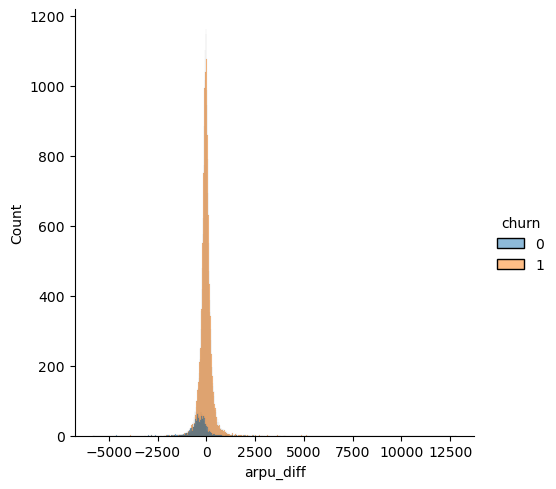

2


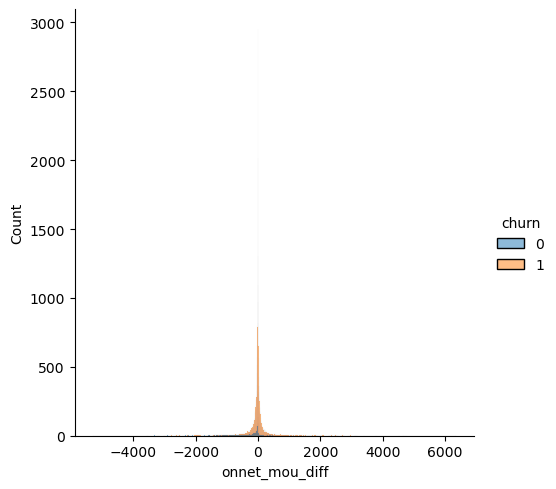

3


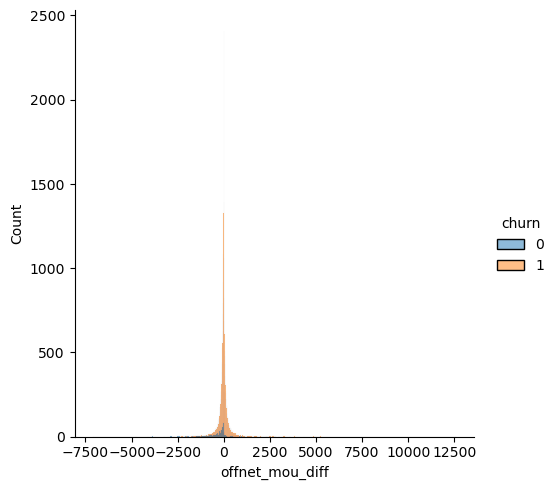

4


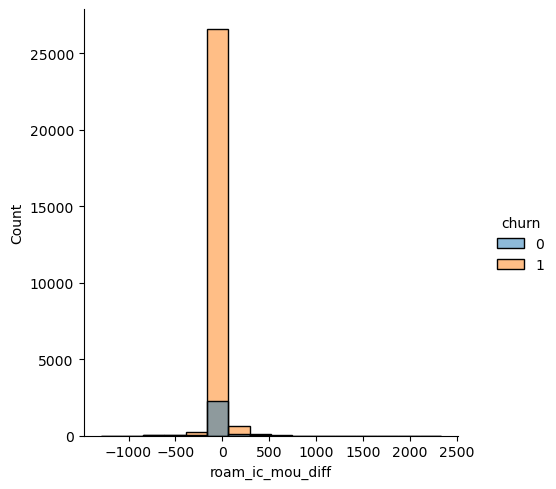

5


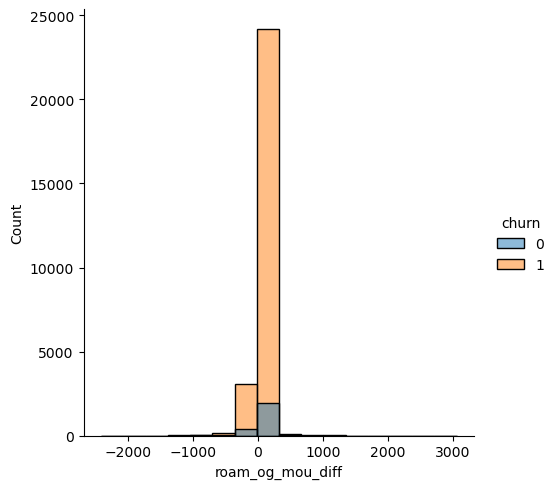

6


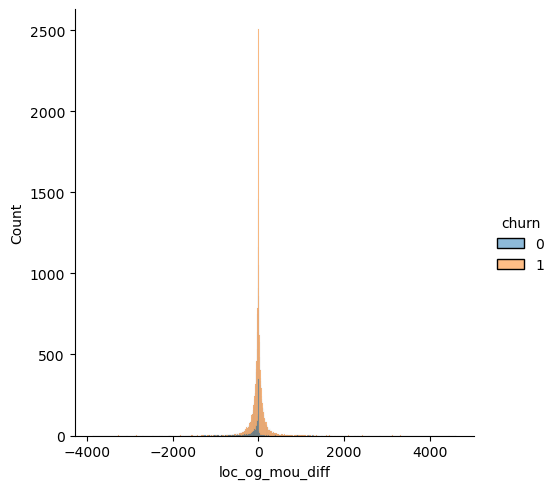

7


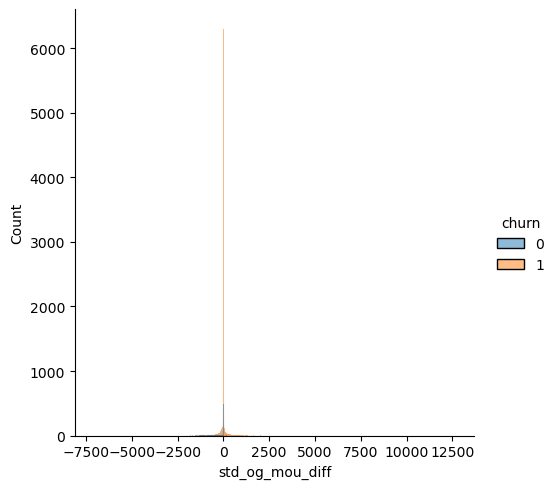

8


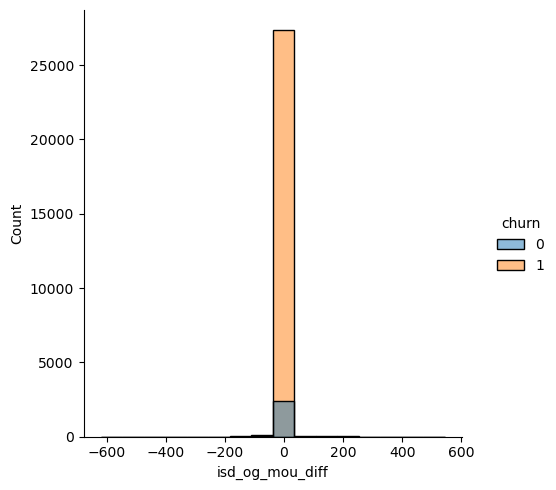

9


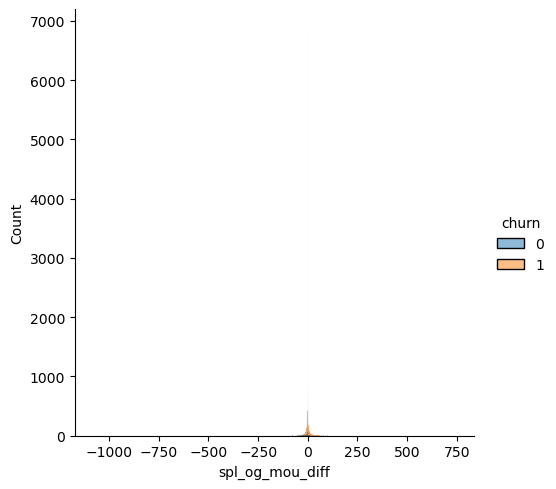

10


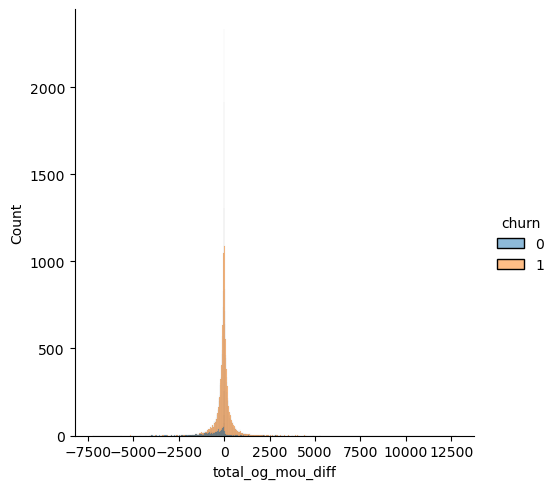

11


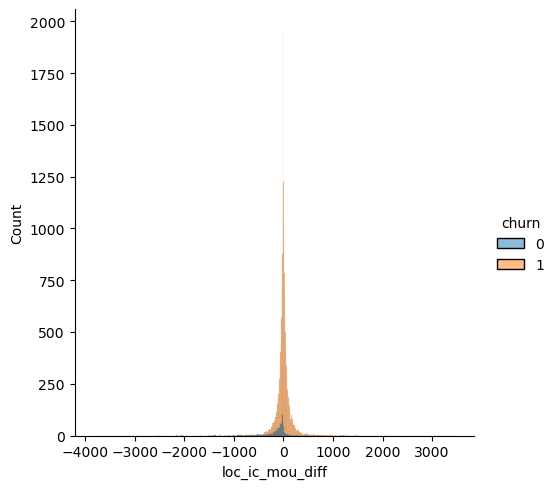

12


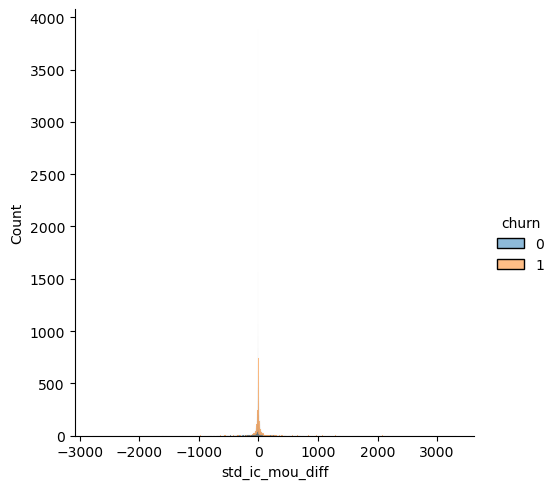

13


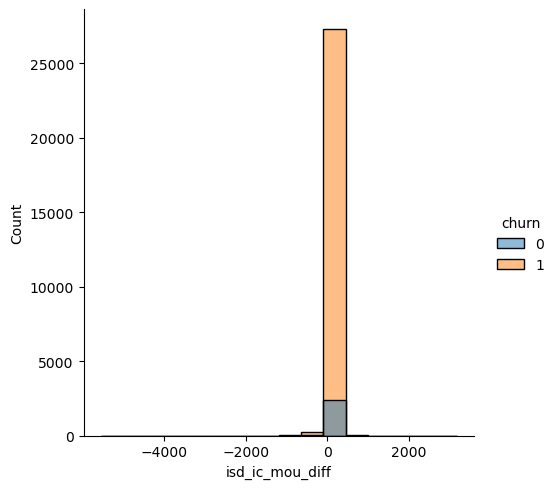

14


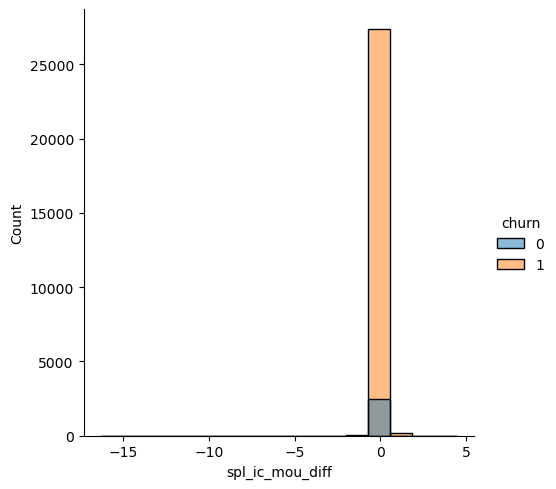

15


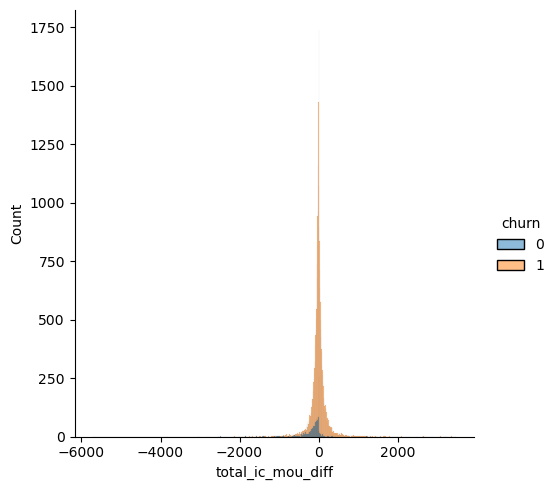

16


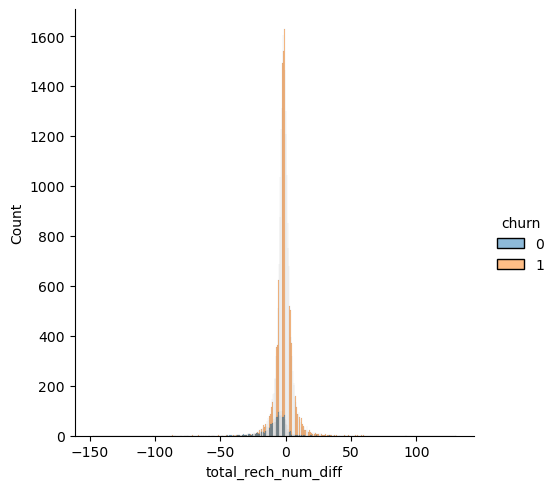

17


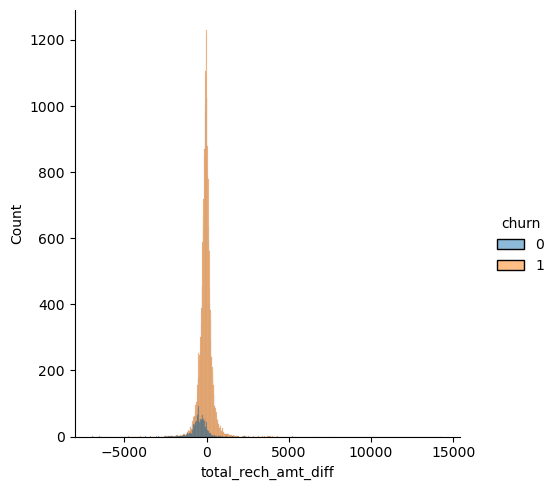

18


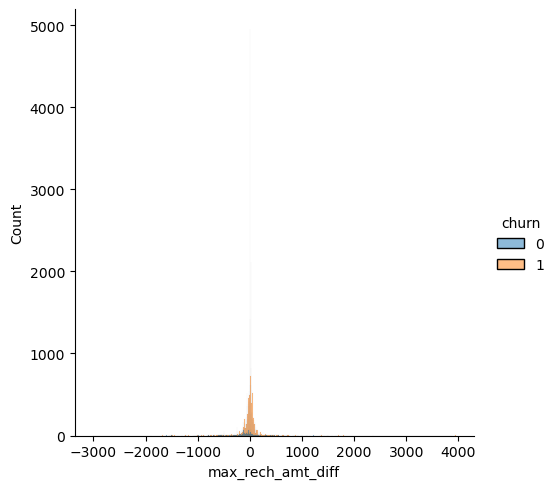

19


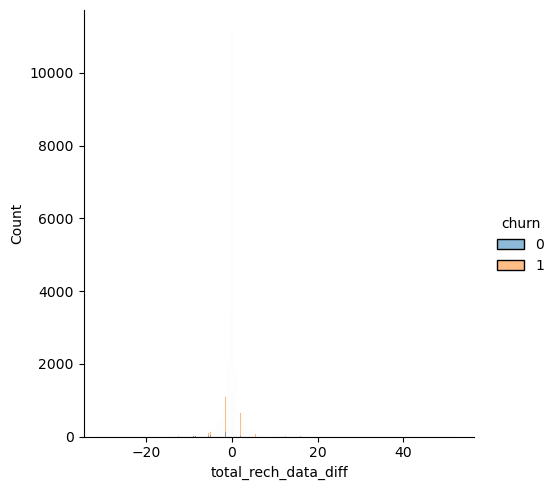

20


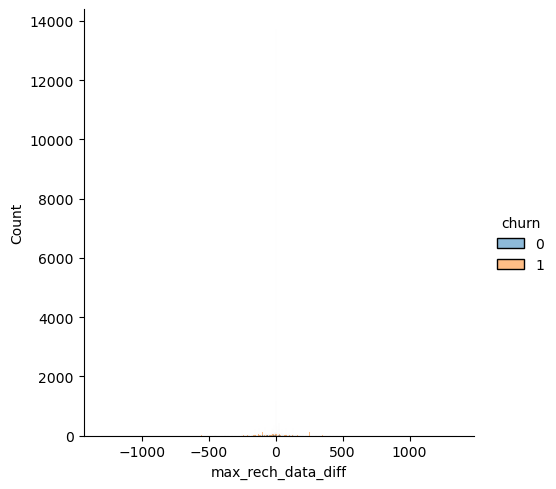

21


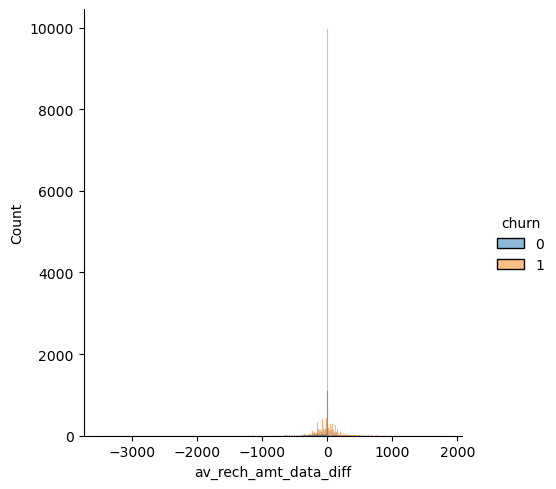

22


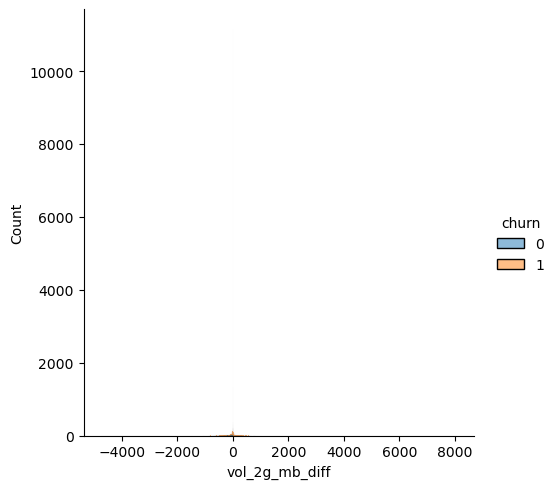

23


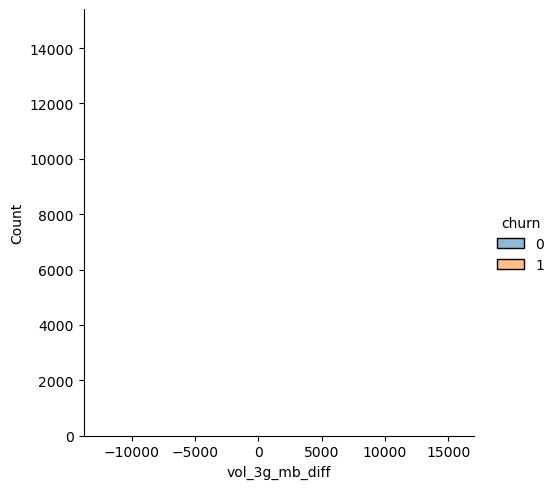

In [73]:
count =  1
while count<24:
    for i in cols_diff_analysis:
        sns.displot(x=data[i],data=data,hue='churn')
        print(count)
        count+=1
        plt.show()
    

In [255]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Total_amt_recharge_data_6,Total_amt_recharge_data_7,Total_amt_recharge_data_8,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,

In [256]:
data[cols_date] = data[cols_date].apply(pd.to_datetime)

data['date_of_last_rech_6'] = data['date_of_last_rech_6'].apply(pd.to_datetime)
data['date_of_last_rech_7'] = data['date_of_last_rech_7'].apply(pd.to_datetime)
data['date_of_last_rech_8'] = data['date_of_last_rech_8'].apply(pd.to_datetime)

data['duration_last_rech_6']= data['last_date_of_month_6']-data['date_of_last_rech_6']
data['duration_last_rech_7']= data['last_date_of_month_7']-data['date_of_last_rech_7']
data['duration_last_rech_8']= data['last_date_of_month_8']-data['date_of_last_rech_8']


data['duration_last_rech_6']=data['duration_last_rech_6'].astype(str)
data['duration_last_rech_6']=data['duration_last_rech_6'].str.split(" ",n=3,expand=True)[0]
data.loc[(data['duration_last_rech_6']=='NaT'),'duration_last_rech_6']=0
data['duration_last_rech_6']=data['duration_last_rech_6'].astype(int)

data['duration_last_rech_7']=data['duration_last_rech_7'].astype(str)
data['duration_last_rech_7']=data['duration_last_rech_7'].str.split(" ",n=3,expand=True)[0]
data.loc[(data['duration_last_rech_7']=='NaT'),'duration_last_rech_7']=0
data['duration_last_rech_7']=data['duration_last_rech_7'].astype(int)

data['duration_last_rech_8']=data['duration_last_rech_8'].astype(str)
data['duration_last_rech_8']=data['duration_last_rech_8'].str.split(" ",n=3,expand=True)[0]
data.loc[(data['duration_last_rech_8']=='NaT'),'duration_last_rech_8']=0
data['duration_last_rech_8']=data['duration_last_rech_8'].astype(int)

data['date_of_last_rech_data_6'] = data['date_of_last_rech_data_6'].apply(pd.to_datetime)
data['date_of_last_rech_data_7'] = data['date_of_last_rech_data_7'].apply(pd.to_datetime)
data['date_of_last_rech_data_8'] = data['date_of_last_rech_data_8'].apply(pd.to_datetime)


data['duration_last_rech_data_6']= data['last_date_of_month_6']-data['date_of_last_rech_data_6']
data['duration_last_rech_data_7']= data['last_date_of_month_7']-data['date_of_last_rech_data_7']
data['duration_last_rech_data_8']= data['last_date_of_month_8']-data['date_of_last_rech_data_8']

data['duration_last_rech_data_6']=data['duration_last_rech_data_6'].astype(str)
data['duration_last_rech_data_6']=data['duration_last_rech_data_6'].str.split(" ",n=3,expand=True)[0]
data.loc[(data['duration_last_rech_data_6']=='NaT'),'duration_last_rech_data_6']=0
data['duration_last_rech_data_6']=data['duration_last_rech_data_6'].astype(int)

data['duration_last_rech_data_7']=data['duration_last_rech_data_7'].astype(str)
data['duration_last_rech_data_7']=data['duration_last_rech_data_7'].str.split(" ",n=3,expand=True)[0]
data.loc[(data['duration_last_rech_data_7']=='NaT'),'duration_last_rech_data_7']=0
data['duration_last_rech_data_7']=data['duration_last_rech_data_7'].astype(int)

data['duration_last_rech_data_8']=data['duration_last_rech_data_8'].astype(str)
data['duration_last_rech_data_8']=data['duration_last_rech_data_8'].str.split(" ",n=3,expand=True)[0]
data.loc[(data['duration_last_rech_data_8']=='NaT'),'duration_last_rech_data_8']=0
data['duration_last_rech_data_8']=data['duration_last_rech_data_8'].astype(int)


In [257]:
#Let's Delete columns which are having only one unique value

data.drop(cols_unique,axis=1,inplace=True)

In [258]:
pd.set_option('display.max_columns', 500)

In [259]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Total_amt_recharge_data_6,Total_amt_recharge_data_7,Total_amt_recharge_data_8,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3

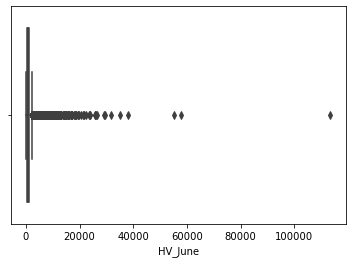

In [260]:
sns.boxplot(data=data,x='HV_June',hue='churn')
plt.show()

#95 percentile value for this col is 2906  and 
# 90 percentile value for this is 2012 
# 99 percentile is 6305 
# after looking at these values keeping values below and equal to 95 % will reduce Outliers 

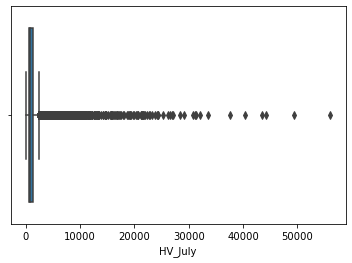

In [261]:
sns.boxplot(data=data,x='HV_July')
plt.show()

#95 percentile value for this col is 2180  and 
# 90 percentile value for this is 3150
# 99 percentile is 7163
# after looking at these values keeping values below and equal to 95 % will reduce Outliers 

In [262]:
data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [263]:
#Let's Divide Dependent and independent variables 
y = data.pop('churn')
X = data

In [264]:
X.head()
#X.churn

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_amt_recharge_data_6,Total_amt_recharge_data_7,Total_amt_recharge_data_8,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,9,15,23,9,15,23
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28

In [265]:
X.isnull().sum()

mobile_number                0
arpu_6                       0
arpu_7                       0
arpu_8                       0
onnet_mou_6                  0
onnet_mou_7                  0
onnet_mou_8                  0
offnet_mou_6                 0
offnet_mou_7                 0
offnet_mou_8                 0
roam_ic_mou_6                0
roam_ic_mou_7                0
roam_ic_mou_8                0
roam_og_mou_6                0
roam_og_mou_7                0
roam_og_mou_8                0
loc_og_t2t_mou_6             0
loc_og_t2t_mou_7             0
loc_og_t2t_mou_8             0
loc_og_t2m_mou_6             0
loc_og_t2m_mou_7             0
loc_og_t2m_mou_8             0
loc_og_t2f_mou_6             0
loc_og_t2f_mou_7             0
loc_og_t2f_mou_8             0
loc_og_t2c_mou_6             0
loc_og_t2c_mou_7             0
loc_og_t2c_mou_8             0
loc_og_mou_6                 0
loc_og_mou_7                 0
loc_og_mou_8                 0
std_og_t2t_mou_6             0
std_og_t

In [266]:
for i in X.columns:
    uni = data[i].nunique()
    if uni==1:
        print(i)
    

In [267]:
#data['offnet_mou_6'].nunique()

In [268]:
X['roam_any_6'] = X[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1)
X['roam_any_7'] = X[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1)
X['roam_any_8'] = X[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1)
#X.head()

In [269]:
# Let's Convert this roam_any_X into a categorical variable type 
X['roam_any_6'] = X['roam_any_6'].apply(lambda x: 1 if (x>0) else 0)
X['roam_any_7'] = X['roam_any_7'].apply(lambda x: 1 if (x>0) else 0)
X['roam_any_8'] = X['roam_any_8'].apply(lambda x: 1 if (x>0) else 0)
X.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_amt_recharge_data_6,Total_amt_recharge_data_7,Total_amt_recharge_data_8,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,9,15,23,9,15,23,0,0,0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31

In [270]:
# since we summarised our columns here 
## Drop columns containing values for roam ic or roam og
## 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'

X = X.drop(columns=['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'])

In [271]:
## Add all local ic and og columns and add a new column which says if local value is true for data
## Summarising the Local incoming and outgoing calls here for three months 
X['local_any_6'] = X[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1)
X['local_any_7'] = X[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1)
X['local_any_8'] = X[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1)

X['local_any_6'] = X['local_any_6'].apply(lambda x: 1 if (x > 0) else 0)
X['local_any_7'] = X['local_any_7'].apply(lambda x: 1 if (x > 0) else 0)
X['local_any_8'] = X['local_any_8'].apply(lambda x: 1 if (x > 0) else 0)

X = X.drop(columns=['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'])
X.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_amt_recharge_data_6,Total_amt_recharge_data_7,Total_amt_recharge_data_8,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,9,15,23,9,15,23,0,0,0,0,0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25

In [272]:
## Add all std ic and og columns and add a new column which says if std value is true for data

## Summarising Standard incoming and outgoing calls 

X['std_any_6'] = X[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1)
X['std_any_7'] = X[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1)
X['std_any_8'] = X[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1)

X['std_any_6'] = X['std_any_6'].apply(lambda x: 1 if (x > 0) else 0)
X['std_any_7'] = X['std_any_7'].apply(lambda x: 1 if (x > 0) else 0)
X['std_any_8'] = X['std_any_8'].apply(lambda x: 1 if (x > 0) else 0)

X = X.drop(columns=['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'])
X.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_amt_recharge_data_6,Total_amt_recharge_data_7,Total_amt_recharge_data_8,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,9,15,23,9,15,23,0,0,0,0,0,1,0,0,0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.0,0.000,0.000,3,6,5,16251,16282,16313,1,1,1,1,1,1,1,1,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,1970-01-01,2014-07-31,2014-08-23,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,0

In [273]:
## Add all isd & spl ic and og columns and add a new column which says if spl value is true for data
X['spl_any_6'] = X[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1)
X['spl_any_7'] = X[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1)
X['spl_any_8'] = X[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1)

X['spl_any_6'] = X['spl_any_6'].apply(lambda x: 1 if (x > 0) else 0)
X['spl_any_7'] = X['spl_any_7'].apply(lambda x: 1 if (x > 0) else 0)
X['spl_any_8'] = X['spl_any_8'].apply(lambda x: 1 if (x > 0) else 0)

X = X.drop(columns=['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',  'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8'])
X.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_amt_recharge_data_6,Total_amt_recharge_data_7,Total_amt_recharge_data_8,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,9,15,23,9,15,23,0,0,0,0,0,1,0,0,0,0,0,0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,1580,790,1580,0,0,779,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.0,0.000,0.000,3,6,5,16251,16282,16313,1,1,1,1,1,1,1,1,1,1,1,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,90,154,30,50,0,10,1970-01-01,2014-07-31,2014-08-23,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,0.0,354.0,138.0,437.0,955.0,258.0,696.0,-298.1100,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-19.5,-177.970,-363.535,5,0,1,16251,0,8,0,0,0,1,1,1,1,1,1,0,0,1
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,50,50,50,30,20,50,1970-01-01,1970-01-01,1970-01-01,0.0

In [274]:
X['sachet_any_6'] = X['sachet_2g_6']+X['sachet_3g_6']
X['sachet_any_7'] = X['sachet_2g_7']+X['sachet_3g_7']
X['sachet_any_8'] = X['sachet_2g_8']+X['sachet_3g_8']

X['sachet_any_6'] = X['sachet_any_6'].apply(lambda x: 1 if (x > 0) else 0)
X['sachet_any_7'] = X['sachet_any_7'].apply(lambda x: 1 if (x > 0) else 0)
X['sachet_any_8'] = X['sachet_any_8'].apply(lambda x: 1 if (x > 0) else 0)

X= X.drop(columns=['sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8'])
X.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_amt_recharge_data_6,Total_amt_recharge_data_7,Total_amt_recharge_data_8,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,sachet_any_6,sachet_any_7,sachet_any_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,1,1,1,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,9,15,23,9,15,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,1580,790,1580,0,0,779,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.0,0.000,0.000,3,6,5,16251,16282,16313,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,90,154,30,50,0,10,1970-01-01,2014-07-31,2014-08-23,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0,1,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,0.0,354.0,138.0,437.0,955.0,258.0,696.0,-298.1100,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-19.5,-177.970,-363.535,5,0,1,16251,0,8,0,0,0,1,1,1,1,1,1,0,0,1,0,1,1
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,50,50,50,30,20,50,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [275]:
## max column will be removed as we already have total recharge column 
X = X.drop(columns=['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'])
X.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_amt_recharge_data_6,Total_amt_recharge_data_7,Total_amt_recharge_data_8,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,sachet_any_6,sachet_any_7,sachet_any_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,1,1,1,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,9,15,23,9,15,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,0,0,779,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.0,0.000,0.000,3,6,5,16251,16282,16313,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,50,0,10,1970-01-01,2014-07-31,2014-08-23,0.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0,1,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,0.0,354.0,138.0,437.0,955.0,258.0,696.0,-298.1100,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-19.5,-177.970,-363.535,5,0,1,16251,0,8,0,0,0,1,1,1,1,1,1,0,0,1,0,1,1
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,30,20,50,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,600.0,680.0,718.0,640.0,81.6570,-32.12,156.085,0.00

In [276]:
## Removing 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8'
##  As we have already done the Calculation for above column is added as 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 

X = X.drop(columns=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'Total_amt_recharge_data_6', 'Total_amt_recharge_data_7', 'Total_amt_recharge_data_8'])
X.head()

#data['Total_amt_recharge_data_7'] + data['total_rech_amt_7']

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,sachet_any_6,sachet_any_7,sachet_any_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,1,1,1,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,9,15,23,9,15,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,0,0,779,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1580.0,790.0,3638.0,1185.0,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.0,0.000,0.000,3,6,5,16251,16282,16313,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,50,0,10,1970-01-01,2014-07-31,2014-08-23,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0,1,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,437.0,955.0,258.0,696.0,-298.1100,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-19.5,-177.970,-363.535,5,0,1,16251,0,8,0,0,0,1,1,1,1,1,1,0,0,1,0,1,1
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,30,20,50,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,720,0.00,0.00,0.00,0.00,600.0,680.0,718.0,640.0,81.6570,-32.12,156.085,0.00,0.000,34.175,89.800,0.000,0.00,123.975,52.605,38.945,0.000,0.000,91.550,3.0,78.0,0.0,0.0,0.0,0.0,0.000,0.000,0,0,0,16251,16282,16313,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,134.38,140.04,239.48,119.58,222.89,298.33,3,5,4,0,454,439,0,179,0,1970-01-01,2014-07-07,2014-08-06,0.0,0.0,0.0,0.0

In [277]:
## Data used 2g and 3g
X['data_used_6'] = X[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
X['data_used_7'] = X[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
X['data_used_8'] = X[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)
X = X.drop(columns=['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'])
X.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,sachet_any_6,sachet_any_7,sachet_any_8,data_used_6,data_used_7,data_used_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,0.0,0.0,0.0,1.0,1.0,1.0,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,1,1,1,1.0,1.0,1.0,968,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,9,15,23,9,15,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,214.90,152.08,145.76
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,0,0,779,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,1580.0,790.0,3638.0,1185.0,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.0,0.000,0.000,3,6,5,16251,16282,16313,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,18.74,19.38,57.74
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,50,0,10,1970-01-01,2014-07-31,2014-08-23,0.0,2.0,3.0,0.0,0.0,0.0,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0,1,0,0,0,0,-1.0,1.0,1.0,315,437.0,955.0,258.0,696.0,-298.1100,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-19.5,-177.970,-363.535,5,0,1,16251,0,8,0,0,0,1,1,1,1,1,1,0,0,1,0,1,1,122.16,2017.60,33.00
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,30,20,50,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,720,600.0,680.0,718.0,640.0,81.6570,-32.12,156.085,0.00,0.000,34.175,89.800,0.000,0.00,123.975,52.605,38.945,0.000,0.000,91.550,3.0,78.0,0.0,0.0,0.0,0.0,0.000,0.000,0,0,0,16251,16282,16313,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0.00,0.00,0.00
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,134.38,140.04,239.48,119.58,222.89,298.33,3,5,4,0,454,439,0,179,0,1970-01-01,2014-07-07,2014-08-06,0.0,0.0,0.0,0.0,2.0,2.0,0.00,306.57,197.27,0.00,301.78,150.67,-1.0,0.0,0.0,0,0,0,0,2,1,-1.0,1.0,1.0,604,0.0,1166.0,979.0,583.0,232.8425,-16.23,118.505,0.00,0.000,49.345,35.255,-0.005,17.66,102.270,78.690,48.375,-10.375,0.000,127.095,0.0,212.0

In [278]:
## Removing column 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'
X = X.drop(columns=['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'])
X.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,sachet_any_6,sachet_any_7,sachet_any_8,data_used_6,data_used_7,data_used_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,252,252,252,2014-06-21,2014-07-16,2014-08-08,0.0,0.0,0.0,1.0,1.0,1.0,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,1,1,1,1.0,1.0,1.0,968,614.0,504.0,504.0,559.0,7.7025,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,5.440,0.000,0.000,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555,9,15,23,9,15,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,214.90,152.08,145.76
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,487.53,609.24,350.16,626.46,558.04,428.74,0,0,779,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,1580.0,790.0,3638.0,1185.0,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.0,0.000,0.000,3,6,5,16251,16282,16313,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,18.74,19.38,57.74
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,508.36,431.66,171.56,103.86,28.49,16.54,50,0,10,1970-01-01,2014-07-31,2014-08-23,0.0,2.0,3.0,0.0,0.0,0.0,0.00,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0,1,0,0,0,0,-1.0,1.0,1.0,315,437.0,955.0,258.0,696.0,-298.1100,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-19.5,-177.970,-363.535,5,0,1,16251,0,8,0,0,0,1,1,1,1,1,1,0,0,1,0,1,1,122.16,2017.60,33.00
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,860.34,1028.79,1068.54,207.09,131.89,261.04,30,20,50,1970-01-01,1970-01-01,1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,720,600.0,680.0,718.0,640.0,81.6570,-32.12,156.085,0.00,0.000,34.175,89.800,0.000,0.00,123.975,52.605,38.945,0.000,0.000,91.550,3.0,78.0,0.0,0.0,0.0,0.0,0.000,0.000,0,0,0,16251,16282,16313,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0.00,0.00,0.00
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,134.38,140.04,239.48,119.58,222.89,298.33,0,179,0,1970-01-01,2014-07-07,2014-08-06,0.0,0.0,0.0,0.0,2.0,2.0,0.00,306.57,197.27,0.00,301.78,150.67,-1.0,0.0,0.0,0,0,0,0,2,1,-1.0,1.0,1.0,604,0.0,1166.0,979.0,583.0,232.8425,-16.23,118.505,0.00,0.000,49.345,35.255,-0.005,17.66,102.270,78.690,48.375,-10.375,0.000,127.095,0.0,212.0,89.5,1.0,89.5,92.0,-0.230,710.375,12,24,7,16251,24,25,0,0,0,1,1,1,1,1,1,1,1,1,0,0,1,0.00,651.43,1050.38


In [279]:
## Removing columns 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'

X = X.drop(columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'])
#X.head()

In [280]:
X.shape

(30001, 92)

In [281]:
# Need to use sns.pairplot for each type of columns 

In [282]:
X.columns 

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'HV_June', 'HV_July',
       'HV_August', 'Average', 'arpu_diff', 'onnet_mou_diff',
       'offnet_mou_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff',
       'loc_og_mou_diff', 'std_og_mou_diff', 'isd_og_mou_diff',
       'spl_og_mou_diff', 'tota

In [283]:
data_cleaned = pd.merge(X,y,left_index=True,right_index=True)

In [284]:
data_cleaned.shape

(30001, 93)

In [285]:
# BEfor standardising splitting is needed 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y , random_state=42)

In [286]:
X_train.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8','mobile_number'],axis=1,inplace=True)

In [411]:
num_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8','aon', 'HV_June', 'HV_July',
       'HV_August', 'Average', 'arpu_diff', 'onnet_mou_diff',
       'offnet_mou_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff',
       'loc_og_mou_diff', 'std_og_mou_diff', 'isd_og_mou_diff',
       'spl_og_mou_diff', 'total_og_mou_diff', 'loc_ic_mou_diff',
       'std_ic_mou_diff', 'isd_ic_mou_diff', 'spl_ic_mou_diff',
       'total_ic_mou_diff', 'total_rech_num_diff', 'total_rech_amt_diff',
       'max_rech_amt_diff', 'total_rech_data_diff', 'max_rech_data_diff',
       'av_rech_amt_data_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff',
       'duration_last_rech_6', 'duration_last_rech_7', 'duration_last_rech_8',
       'duration_last_rech_data_6', 'duration_last_rech_data_7',
       'duration_last_rech_data_8', 'roam_any_6', 'roam_any_7', 'roam_any_8',
       'local_any_6', 'local_any_7', 'local_any_8', 'std_any_6', 'std_any_7',
       'std_any_8', 'spl_any_6', 'spl_any_7', 'spl_any_8', 'sachet_any_6',
       'sachet_any_7', 'sachet_any_8', 'data_used_6', 'data_used_7',
       'data_used_8']

plt.figure(figsize=(30,30))
sns.pairplot(data_cleaned)
plt.show()

In [287]:
# Let's Standarise the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train[num_cols])

In [288]:
# Using SMOTE for balancing data sets which are imbalanced
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)

print('Before : ',counter)

smt = SMOTE()

X_train_sm,y_train_sm = smt.fit_resample(X_train_sc,y_train)

counter = Counter(y_train_sm)

print('After : ',counter)



Before :  Counter({0: 22047, 1: 1953})
After :  Counter({0: 22047, 1: 22047})


In [289]:
# Apply PCA for Dimension reductionality 

## Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
## Doing the PCA on the train data
pca.fit(X_train_sm)
pca.components_

array([[-1.02626396e-01, -4.50853012e-03,  1.12226073e-01, ...,
         8.59267264e-02,  1.11034683e-01,  1.12692031e-01],
       [-5.07893226e-02, -1.31011144e-01, -1.47470942e-01, ...,
         1.21644717e-01,  7.82877132e-02,  3.27968818e-02],
       [ 2.06481889e-01,  1.82704030e-01,  5.04789053e-02, ...,
         1.53468622e-01,  1.61534288e-01,  1.33048762e-01],
       ...,
       [ 0.00000000e+00, -4.46354813e-17,  6.84611648e-17, ...,
        -6.93889390e-17,  2.04697370e-16, -7.63278329e-17],
       [-0.00000000e+00, -1.96798064e-16, -5.83606166e-18, ...,
         1.24900090e-16,  2.08166817e-16, -5.06539255e-16],
       [ 0.00000000e+00,  1.17961196e-16,  1.47808754e-17, ...,
        -1.04083409e-17, -1.37043155e-16,  4.66640615e-16]])

In [290]:
## Verifying PC and variables
cols_PCA = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':cols_PCA})
pcs_df.head(20)

,PC1,PC2,Feature
0,-0.102626,-0.050789,arpu_6
1,-0.004509,-0.131011,arpu_7
2,0.112226,-0.147471,arpu_8
3,-0.116438,-0.117769,onnet_mou_6
4,-0.055563,-0.142050,onnet_mou_7
5,0.030217,-0.122230,onnet_mou_8
6,-0.118207,-0.122345,offnet_mou_6
7,-0.049258,-0.160218,offnet_mou_7
8,0.051193,-0.138850,offnet_mou_8
9,-0.155677,-0.164676,total_og_mou_6


In [291]:
# Let's look at the explained variance ratio PC 

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))


0      14.50
1      25.65
2      33.00
3      38.84
4      43.44
5      47.34
6      50.53
7      53.39
8      56.08
9      58.64
10     61.15
11     63.48
12     65.60
13     67.68
14     69.57
15     71.23
16     72.81
17     74.21
18     75.57
19     76.86
20     78.05
21     79.19
22     80.27
23     81.32
24     82.32
25     83.30
26     84.19
27     85.05
28     85.84
29     86.62
30     87.36
31     88.08
32     88.79
33     89.49
34     90.15
35     90.79
36     91.41
37     92.01
38     92.58
39     93.11
40     93.62
41     94.11
42     94.57
43     95.01
44     95.43
45     95.84
46     96.20
47     96.54
48     96.87
49     97.17
50     97.46
51     97.73
52     97.99
53     98.20
54     98.39
55     98.57
56     98.73
57     98.89
58     99.03
59     99.16
60     99.29
61     99.38
62     99.47
63     99.54
64     99.61
65     99.67
66     99.73
67     99.78
68     99.82
69     99.86
70     99.89
71     99.91
72     99.93
73     99.95
74     99.97
75     99.98
76     99.99

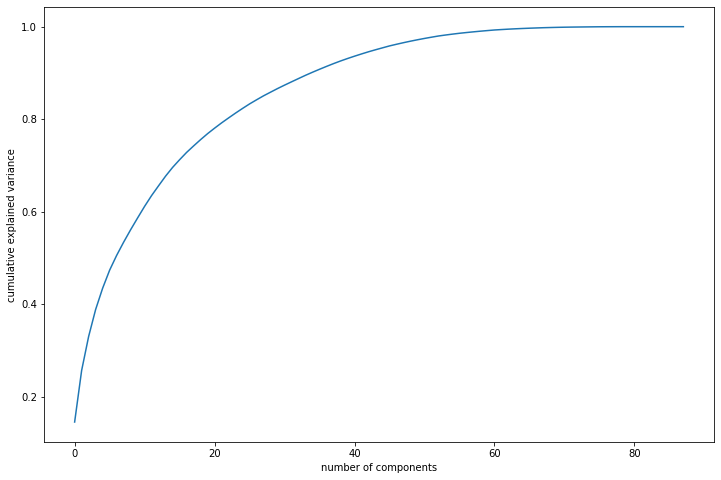

In [292]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [293]:
# According to the plot we are capturing 95% of variance by 43 features 
# Lets have our PCA which will have 43 components

In [294]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(n_components=43, random_state=42)

In [295]:
X_train_pca = pca.fit_transform(X_train_sm)
X_train_pca.shape

(44094, 43)

In [296]:
# Designing Logistic Regression for making the Classification model

In [297]:
from sklearn.linear_model import LogisticRegression

Log_reg = LogisticRegression(random_state=42)

Log_reg.fit(X_train_pca,y_train_sm)

LogisticRegression(random_state=42)

In [298]:
round(Log_reg.score(X_train_pca, y_train_sm) * 100, 2)


85.52

In [299]:
X_test.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8','mobile_number'],axis=1,inplace=True)

In [300]:
X_test_sc = scaler.transform(X_test)

In [301]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(6001, 43)

In [302]:
y_train_df = pd.DataFrame(y_train_sm)
y_train_df.reset_index(drop=True ,inplace=True)
y_train_df.columns=['Actual']
y_train_df.head()

,Actual
0,0
1,0
2,0
3,0
4,0


In [303]:
# Predicted probabilities
y_train_pred = Log_reg.predict_proba(X_train_pca)
#y_pred = Log_reg.predict(X_train_pca).reshape(-1)
#y_ppp = Log_reg.predict(X_train_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_train_pred)
y_pred_df.reset_index(drop=True ,inplace=True)
# Converting to column dataframe
y_pred_df = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_df.columns = ['Churn_Pred']
#y_pred_df['Churn_predicted'] = y_pred
#y_pred['Churn'] = Log_reg.predict(X_train_pca).values.reshape(-1)

y_pred_df = pd.concat([y_pred_df,y_train_df],axis=1)
y_pred_df.head()

,Churn_Pred,Actual
0,0.080328,0
1,0.108153,0
2,0.273278,0
3,0.055345,0
4,0.239666,0


In [304]:
y_pred_df.shape

(44094, 2)

In [305]:
# Considering rough value like for prob & Creating new column 'Predicted' with 1 if Converted_Prob > 0.3 else 0

y_pred_df['Predicted'] = y_pred_df.Churn_Pred.map(lambda x: 1 if x > 0.3 else 0)

In [306]:
y_pred_df.head()
#pd.to_numeric(y_pred_df['Actual'],downcast='integer')
#y_pred_df =y_pred_df['Actual'].astype('int')

,Churn_Pred,Actual,Predicted
0,0.080328,0,0
1,0.108153,0,0
2,0.273278,0,0
3,0.055345,0,0
4,0.239666,0,0


In [307]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
confusion = metrics.confusion_matrix(y_pred_df['Actual'],y_pred_df.Predicted )
confusion

array([[16507,  5540],
       [ 1772, 20275]], dtype=int64)

In [308]:
TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]

In [309]:
# sensitivity 
TP/float(TP+FN)

0.9196262530049439

In [310]:
#Specificity 
TN / float(TN+FP)

0.7487186465278722

In [311]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2512813534721277


In [312]:
# positive predictive value 
print (TP / float(TP+FP))

0.7853960875460004


In [313]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9030581541659828


# ROC Curve 

In [314]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [315]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_df['Actual'], y_pred_df.Predicted, drop_intermediate = False )

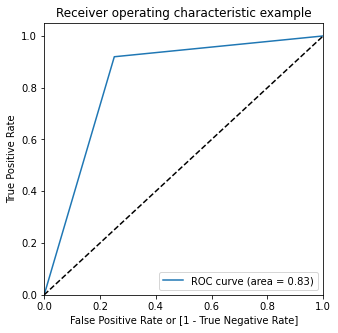

In [316]:
draw_roc(y_pred_df['Actual'], y_pred_df.Predicted)

In [317]:
# We can do hyperparameter tuning for the Logistic Regression to improve the performance

# Finding the optimal cutoff point

In [318]:
# Let's create columns with different probability cutoffs 
y_train_pred_final = {}
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_df[i]= y_pred_df.Churn_Pred.map(lambda x: 1 if x > i else 0)
y_pred_df.head()

,Churn_Pred,Actual,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.080328,0,0,1,0,0,0,0,0,0,0,0,0
1,0.108153,0,0,1,1,0,0,0,0,0,0,0,0
2,0.273278,0,0,1,1,1,0,0,0,0,0,0,0
3,0.055345,0,0,1,0,0,0,0,0,0,0,0,0
4,0.239666,0,0,1,1,1,0,0,0,0,0,0,0


In [319]:
#y_pred_df

In [320]:
cut_off_df = pd.DataFrame(columns= ['prob','accuracy','Sensitivity','Specificity'])

In [321]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_df.Actual,y_pred_df[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cut_off_df.loc[i] =[ i ,accuracy,Sensitivity,Specificity]
print(cut_off_df)

     prob  accuracy  Sensitivity  Specificity
0.0   0.0  0.500000     0.000000     1.000000
0.1   0.1  0.702340     0.425228     0.979453
0.2   0.2  0.787023     0.621309     0.952737
0.3   0.3  0.834172     0.748719     0.919626
0.4   0.4  0.854357     0.828956     0.879757
0.5   0.5  0.855173     0.877670     0.832676
0.6   0.6  0.848301     0.909602     0.787000
0.7   0.7  0.834422     0.936771     0.732072
0.8   0.8  0.801969     0.957318     0.646619
0.9   0.9  0.749921     0.976187     0.523654


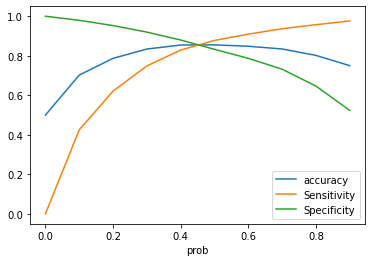

In [322]:
cut_off_df.plot.line(x='prob',y=['accuracy','Sensitivity','Specificity'])
plt.show()

In [323]:
# Cut off Probability seems to be best parameter  which is around 0.45

In [324]:
y_pred_df['final_predicted'] = y_pred_df.Churn_Pred.map( lambda x: 1 if x > 0.45 else 0)

y_pred_df.head()

,Churn_Pred,Actual,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.080328,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.108153,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0.273278,0,0,1,1,1,0,0,0,0,0,0,0,0
3,0.055345,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.239666,0,0,1,1,1,0,0,0,0,0,0,0,0


In [325]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_df.Actual, y_pred_df.final_predicted)

0.8561028711389305

In [326]:
confusion2 = metrics.confusion_matrix(y_pred_df.Actual,y_pred_df.final_predicted)
confusion2

array([[18860,  3187],
       [ 3158, 18889]], dtype=int64)

In [327]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [328]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.856760556991881

In [329]:
# Let us calculate specificity
TN / float(TN+FP)

0.8554451852859799

In [330]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14455481471402004


In [331]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8556350788186265


In [332]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8565718957216822


# PRECISION AND RECALL 

In [333]:
confusion = metrics.confusion_matrix(y_pred_df.Actual, y_pred_df.final_predicted )
confusion

array([[18860,  3187],
       [ 3158, 18889]], dtype=int64)

In [334]:
# Precision 

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8556350788186265

In [335]:
#Recall 
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.856760556991881

In [336]:
from sklearn.metrics import precision_score, recall_score

In [337]:
precision_score(y_pred_df.Actual, y_pred_df.final_predicted)

0.8556350788186265

In [338]:
recall_score(y_pred_df.Actual, y_pred_df.final_predicted)

0.856760556991881

In [339]:
# Lets apply the Algorithm on the Test Set 

In [340]:
# Predicted probabilities
y_test_pred1 = Log_reg.predict_proba(X_test_pca)
#y_test_pred = Log_reg.predict(X_test_pca)
#y_ppp = Log_reg.predict(X_train_pca)
# Converting y_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred1)
# Converting to column dataframe
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
# Let's see the head
y_test_pred_df.columns = ['Churn_Prob']
#y_test_pred_df['Churn'] = y_test_pred
#y_pred['Churn'] = Log_reg.predict(X_train_pca).values.reshape(-1)
y_test_pred_df.head()

,Churn_Prob
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [341]:
y_test_1 = pd.DataFrame(y_test)

In [342]:

y_test_1.reset_index(drop=True,inplace=True)
y_test_1.columns = ['Actual']
#y_test_1

In [343]:
y_test_pred_df['final_predicted'] = y_test_pred_df.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [344]:
# Appending them 
y_test_pred_df = pd.concat([y_test_pred_df,y_test_1],axis=1)

In [345]:
 y_test_pred_df

,Churn_Prob,final_predicted,Actual
0,0.0,0,0
1,1.0,1,0
2,0.0,0,0
3,1.0,1,1
4,0.0,0,0
...,...,...,...
5996,0.0,0,0
5997,1.0,1,0
5998,1.0,1,0
5999,1.0,1,0


In [346]:
confusion2 = metrics.confusion_matrix(y_test_pred_df.Actual, y_test_pred_df.final_predicted)
confusion2

array([[3182, 2331],
       [  80,  408]], dtype=int64)

In [347]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_df.Actual, y_test_pred_df.final_predicted)

0.5982336277287119

In [348]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [349]:
# Let's see the recall of our logistic regression model
round(TP / float(TP+FN), 4) * 100


83.61

In [350]:
#lets see what the precision looks like
round(TP / float(TP+FP), 4) * 100


14.899999999999999

# Using Logistic Regression with RFE and VIF 

In [413]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')

In [414]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'HV_June', 'HV_July',
       'HV_August', 'Average', 'arpu_diff', 'onnet_mou_diff',
       'offnet_mou_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff',
       'loc_og_mou_diff', 'std_og_mou_diff', 'isd_og_mou_diff',
       'spl_og_mou_diff', 'total_og_mou_diff', 'loc_ic_mou_diff',
       'std_ic_mou_diff', 'isd_ic_mou_diff', 'spl_ic_mou_diff',
       'total_ic

In [415]:
num_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8','aon', 'HV_June', 'HV_July',
       'HV_August', 'Average', 'arpu_diff', 'onnet_mou_diff',
       'offnet_mou_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff',
       'loc_og_mou_diff', 'std_og_mou_diff', 'isd_og_mou_diff',
       'spl_og_mou_diff', 'total_og_mou_diff', 'loc_ic_mou_diff',
       'std_ic_mou_diff', 'isd_ic_mou_diff', 'spl_ic_mou_diff',
       'total_ic_mou_diff', 'total_rech_num_diff', 'total_rech_amt_diff',
       'max_rech_amt_diff', 'total_rech_data_diff', 'max_rech_data_diff',
       'av_rech_amt_data_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff',
       'duration_last_rech_6', 'duration_last_rech_7', 'duration_last_rech_8',
       'duration_last_rech_data_6', 'duration_last_rech_data_7',
       'duration_last_rech_data_8', 'roam_any_6', 'roam_any_7', 'roam_any_8',
       'local_any_6', 'local_any_7', 'local_any_8', 'std_any_6', 'std_any_7',
       'std_any_8', 'spl_any_6', 'spl_any_7', 'spl_any_8', 'sachet_any_6',
       'sachet_any_7', 'sachet_any_8', 'data_used_6', 'data_used_7',
       'data_used_8']

In [416]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [417]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,sachet_any_6,sachet_any_7,sachet_any_8,data_used_6,data_used_7,data_used_8
65954,0.290362,-0.291455,-0.088901,-0.073831,-0.349513,-0.204959,-0.682470,-0.577901,-0.519066,-0.486990,-0.610423,-0.466398,-0.181960,-0.205692,0.236929,0.132514,1.054504,0.355191,2.080213,1.129542,1.111086,2.212150,0.895039,1.014361,0.0,0.0,0.0,0,0,0,2,1,1,1.0,1.0,1.0,-0.902918,0.482460,-0.181803,-0.234663,0.175897,-0.120046,0.023208,0.163920,0.028939,0.038636,0.008744,0.136896,0.01629,-0.007469,0.121049,0.440598,0.710808,0.118930,0.079292,0.705321,-0.623713,-0.709063,0.077452,-0.168838,0.081822,-0.761081,0.059530,-0.754108,-0.055933,-0.059693,-0.139674,-0.886838,-0.869548,-0.933561,-0.537593,-0.463156,-0.47815,0.199653,0.190563,0.278717,0.408139,0.411952,0.475385,0.570486,0.592492,0.632382,-0.692703,-0.703199,-0.671129,1.453347,1.302555,0.858778
46576,-0.825951,-0.582284,-0.341413,-0.559454,-0.552747,-0.505428,-0.622577,-0.488371,-0.583119,-0.770667,-0.685435,-0.707487,-0.698236,-0.626836,-0.726053,-0.548107,-0.356861,-0.429184,1.472011,0.450771,0.548068,1.659978,0.521726,0.609317,0.0,0.0,0.0,0,0,1,2,1,1,1.0,1.0,1.0,0.514330,-0.008993,-0.460412,-0.180832,-0.280645,0.470964,0.100143,-0.029223,0.028939,0.038636,-0.151158,0.109839,0.01629,0.128525,0.034129,-0.108821,0.021712,0.008937,0.938629,-0.075752,-0.028398,0.452571,0.199890,0.292206,-0.381406,0.386240,-0.456560,1.089199,-0.054740,-0.059693,-0.140562,-0.888327,-0.870541,-0.935897,-0.537593,-0.463156,-0.47815,0.199653,0.190563,0.278717,-2.450145,0.411952,-2.103558,0.570486,0.592492,0.632382,-0.692703,-0.703199,-0.671129,0.716020,0.999641,1.666307
36232,0.819825,0.809438,0.210287,1.396746,0.965341,1.070720,-0.036736,-0.082994,-0.330121,0.947109,0.616672,0.500195,-0.493628,-0.294043,-0.470181,-0.498990,-0.497997,-0.429184,-0.368731,-0.375991,-0.368593,-0.388389,-0.392863,-0.383008,-1.0,-1.0,-1.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-0.596910,-0.043830,-0.105094,-0.193945,-0.088706,-0.800512,-0.211244,-0.371321,0.028939,0.038636,0.054083,-0.510608,0.01629,0.400225,-0.396483,-0.196846,0.105432,0.008937,0.079292,-0.108886,-1.442270,-0.607680,0.199890,0.061684,0.081822,0.084313,0.076503,0.007530,-0.055933,-0.060780,-0.142781,1.127103,1.148700,1.068866,-0.537593,-0.463156,-0.47815,0.199653,0.190563,0.278717,0.408139,0.411952,0.475385,-1.752891,-1.687786,0.632382,-0.692703,-0.703199,-0.671129,-0.495030,-0.522106,-0.496820
31046,1.345300,1.443793,0.766844,-0.303482,-0.414705,-0.346380,0.550828,0.360882,-0.015227,0.212579,-0.005996,-0.213276,3.312601,2.747952,0.976444,1.044686,1.068617,0.258864,0.799706,0.793394,0.935770,0.925976,2.206555,1.993712,0.0,0.0,0.0,0,0,0,1,1,1,1.0,1.0,1.0,1.857426,0.390390,0.226904,0.216689,0.366001,-0.809574,0.036689,-0.656507,0.028939,0.038636,-0.384691,-0.324833,0.01629,-0.007469,-0.440470,-1.031416,-5.874626,0.187009,-1.194896,-3.444812,-0.251641,-0.

In [358]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [399]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg,n_features_to_select=20)

rfe = rfe.fit(X_train, y_train)

In [400]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 22),
 ('arpu_7', False, 17),
 ('arpu_8', False, 46),
 ('onnet_mou_6', False, 34),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 19),
 ('offnet_mou_6', False, 36),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 69),
 ('total_og_mou_6', False, 35),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', False, 18),
 ('total_ic_mou_6', False, 9),
 ('total_ic_mou_7', False, 25),
 ('total_ic_mou_8', True, 1),
 ('last_day_rch_amt_6', False, 51),
 ('last_day_rch_amt_7', False, 67),
 ('last_day_rch_amt_8', True, 1),
 ('arpu_3g_6', False, 32),
 ('arpu_3g_7', False, 23),
 ('arpu_3g_8', False, 59),
 ('arpu_2g_6', False, 31),
 ('arpu_2g_7', False, 6),
 ('arpu_2g_8', False, 15),
 ('night_pck_user_6', True, 1),
 ('night_pck_user_7', False, 13),
 ('night_pck_user_8', False, 33),
 ('monthly_2g_6', True, 1),
 ('monthly_2g_7', False, 12),
 ('monthly_2g_8', True, 1),
 ('monthly_3g_6', False, 53),
 ('monthly_3g_7', False, 5),
 ('monthly_3g_8', False, 14),
 ('fb_user_6', True, 1),
 

In [401]:
col = X_train.columns[rfe.support_]

print(col)


Index(['onnet_mou_7', 'offnet_mou_7', 'total_og_mou_7', 'total_ic_mou_8',
       'last_day_rch_amt_8', 'night_pck_user_6', 'monthly_2g_6',
       'monthly_2g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'loc_ic_mou_diff', 'total_rech_amt_diff', 'duration_last_rech_data_6',
       'duration_last_rech_data_7', 'duration_last_rech_data_8', 'roam_any_7',
       'roam_any_8', 'local_any_8', 'data_used_8'],
      dtype='object')


# Assessing with Stats model

In [420]:
df_for_sm = pd.DataFrame(X_train_sm)
df_for_sm.columns=['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'HV_June', 'HV_July',
       'HV_August', 'Average', 'arpu_diff', 'onnet_mou_diff',
       'offnet_mou_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff',
       'loc_og_mou_diff', 'std_og_mou_diff', 'isd_og_mou_diff',
       'spl_og_mou_diff', 'total_og_mou_diff', 'loc_ic_mou_diff',
       'std_ic_mou_diff', 'isd_ic_mou_diff', 'spl_ic_mou_diff',
       'total_ic_mou_diff', 'total_rech_num_diff', 'total_rech_amt_diff',
       'max_rech_amt_diff', 'total_rech_data_diff', 'max_rech_data_diff',
       'av_rech_amt_data_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff',
       'duration_last_rech_6', 'duration_last_rech_7', 'duration_last_rech_8',
       'duration_last_rech_data_6', 'duration_last_rech_data_7',
       'duration_last_rech_data_8', 'roam_any_6', 'roam_any_7', 'roam_any_8',
       'local_any_6', 'local_any_7', 'local_any_8', 'std_any_6', 'std_any_7',
       'std_any_8', 'spl_any_6', 'spl_any_7', 'spl_any_8', 'sachet_any_6',
       'sachet_any_7', 'sachet_any_8', 'data_used_6', 'data_used_7',
       'data_used_8']

In [421]:
df_for_sm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,HV_June,HV_July,HV_August,Average,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,sachet_any_6,sachet_any_7,sachet_any_8,data_used_6,data_used_7,data_used_8
0,0.290362,-0.291455,-0.088901,-0.073831,-0.349513,-0.204959,-0.682470,-0.577901,-0.519066,-0.486990,-0.610423,-0.466398,-0.181960,-0.205692,0.236929,0.132514,1.054504,0.355191,2.080213,1.129542,1.111086,2.212150,0.895039,1.014361,0.818375,0.808466,0.874932,-0.401032,-0.407583,-0.378791,2.902002,1.169956,1.261960,0.945146,0.932172,1.017319,-0.902918,0.482460,-0.181803,-0.234663,0.175897,-0.120046,0.023208,0.163920,0.028939,0.038636,0.008744,0.136896,0.01629,-0.007469,0.121049,0.440598,0.710808,0.118930,0.079292,0.705321,-0.623713,-0.709063,0.077452,-0.168838,0.081822,-0.761081,0.059530,-0.754108,-0.055933,-0.059693,-0.139674,-0.886838,-0.869548,-0.933561,-0.537593,-0.463156,-0.47815,0.199653,0.190563,0.278717,0.408139,0.411952,0.475385,0.570486,0.592492,0.632382,-0.692703,-0.703199,-0.671129,1.453347,1.302555,0.858778
1,-0.825951,-0.582284,-0.341413,-0.559454,-0.552747,-0.505428,-0.622577,-0.488371,-0.583119,-0.770667,-0.685435,-0.707487,-0.698236,-0.626836,-0.726053,-0.548107,-0.356861,-0.429184,1.472011,0.450771,0.548068,1.659978,0.521726,0.609317,0.818375,0.808466,0.874932,-0.401032,-0.407583,2.070948,2.902002,1.169956,1.261960,0.945146,0.932172,1.017319,0.514330,-0.008993,-0.460412,-0.180832,-0.280645,0.470964,0.100143,-0.029223,0.028939,0.038636,-0.151158,0.109839,0.01629,0.128525,0.034129,-0.108821,0.021712,0.008937,0.938629,-0.075752,-0.028398,0.452571,0.199890,0.292206,-0.381406,0.386240,-0.456560,1.089199,-0.054740,-0.059693,-0.140562,-0.888327,-0.870541,-0.935897,-0.537593,-0.463156,-0.47815,0.199653,0.190563,0.278717,-2.450145,0.411952,-2.103558,0.570486,0.592492,0.632382,-0.692703,-0.703199,-0.671129,0.716020,0.999641,1.666307
2,0.819825,0.809438,0.210287,1.396746,0.965341,1.070720,-0.036736,-0.082994,-0.330121,0.947109,0.616672,0.500195,-0.493628,-0.294043,-0.470181,-0.498990,-0.497997,-0.429184,-0.368731,-0.375991,-0.368593,-0.388389,-0.392863,-0.383008,-1.099130,-1.122392,-1.046588,-0.401032,-0.407583,-0.378791,-0.353645,-0.346677,-0.339427,-1.104136,-1.123429,-1.040469,-0.596910,-0.043830,-0.105094,-0.193945,-0.088706,-0.800512,-0.211244,-0.371321,0.028939,0.038636,0.054083,-0.510608,0.01629,0.400225,-0.396483,-0.196846,0.105432,0.008937,0.079292,-0.108886,-1.442270,-0.607680,0.199890,0.061684,0.081822,0.084313,0.076503,0.007530,-0.055933,-0.060780,-0.142781,1.127103,1.148700,1.068866,-0.537593,-0.463156,-0.47815,0.199653,0.190563,0.278717,0.408139,0.411952,0.475385,-1.752891,-1.687786,0.632382,-0.692703,-0.703199,-0.671129,-0.495030,-0.522106,-0.496820
3,1.345300,1.443793,0.766844,-0.303482,-0.414705,-0.346380,0.550828,0.360882,-0.015227,0.212579,-0.005996,-0.213276,3.312601,2.747952,0.976444,1.044686,1.068617,0.258864,0.799706,0.793394,0.935770,0.925976,2.206555,1.993712,0.818375,0.808466,0.874932,

In [422]:
import statsmodels.api as sm


In [423]:
#X_train_sm1 = sm.add_constant(X_train_sm_stat[col])
X_train_sm_stat = sm.add_constant(df_for_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_sm_stat, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44094
Model:                            GLM   Df Residuals:                    44073
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16011.
Date:                Wed, 24 Nov 2021   Deviance:                       32023.
Time:                        22:36:30   Pearson chi2:                 7.70e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.5784      0.023    -69.926      0.000      -1.623      -1.534
onnet_mou_7                   0.2796      0.076      3.697      0.000       0.131       0.428
offnet_mou_7                  0.2585      0.077      3.372      0.001       0.108       0.409
total_og_mou_7               -0.3496      0.110     -3.170      0.002      -0.566      -0.133
total_ic_mou_8               -1.1438      0.035    -32.250      0.000      -1.213      -1.074
last_day_rch_amt_8           -0.3859      0.024    -16.407      0.000      -0.432      -0.340
night_pck_user_6              0.1343      0.066      2.045      0.041       0.006       0.263
monthly_2g_6                 -0.1742      0.021     -8.164      0.000      -0.216      -0.132
monthly_2g_8                 -0.2037      0.029     -6.938      0.000      -0.261      -0.146
fb_user_6                     0.8218      0.098      8.422      0.000       0.631       1.013
fb_user_7                     0.7102      0.095      7.483      0.000       0.524       0.896
fb_user_8                    -0.9315      0.079    -11.797      0.000      -1.086      -0.777
loc_ic_mou_diff              -0.4213      0.022    -18.758      0.000      -0.465      -0.377
total_rech_amt_diff          -0.3856      0.018    -20.892      0.000      -0.422      -0.349
duration_last_rech_data_6     0.8207      0.114      7.197      0.000       0.597       1.044
duration_last_rech_data_7     0.5007      0.091      5.527      0.000       0.323       0.678
duration_last_rech_data_8    -0.3909      0.071     -5.488      0.000      -0.530      -0.251
roam_any_7                   -0.2851      0.018    -16.159      0.000      -0.320      -0.251
roam_any_8                    0.7063      0.014     50.025      0.000       0.679       0.734
local_any_8                  -0.7006      0.013    -52.581      0.000      -0.727      -0.674
data_used_8                  -0.4154      0.034    -12.192      0.000      -0.482      -0.349
=============================================================================================
"""

In [424]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [426]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_stat[col].values, i) for i in range(X_train_sm_stat[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,duration_last_rech_data_6,66.07
2,total_og_mou_7,55.56
8,fb_user_6,46.18
9,fb_user_7,45.57
14,duration_last_rech_data_7,42.47
10,fb_user_8,34.88
15,duration_last_rech_data_8,30.73
1,offnet_mou_7,27.27
0,onnet_mou_7,26.34
5,night_pck_user_6,23.79


In [427]:
y_train_pred = res.predict(X_train_sm_stat).values.reshape(-1)

In [429]:
y_train_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Converted_prob'] = y_train_pred

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.060637,0
1,0,0.083537,0
2,0,0.407605,0
3,0,0.078673,0
4,0,0.192754,0


In [430]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[19340  2707]
 [ 3792 18255]]


In [431]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.060637,0,1,0,0,0,0,0,0,0,0,0
1,0,0.083537,0,1,0,0,0,0,0,0,0,0,0
2,0,0.407605,0,1,1,1,1,1,0,0,0,0,0
3,0,0.078673,0,1,0,0,0,0,0,0,0,0,0
4,0,0.192754,0,1,1,0,0,0,0,0,0,0,0


In [432]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.678324  0.978047  0.378600
0.2   0.2  0.770014  0.953009  0.587019
0.3   0.3  0.830680  0.919127  0.742233
0.4   0.4  0.849662  0.871320  0.828004
0.5   0.5  0.852610  0.828004  0.877217
0.6   0.6  0.843380  0.772395  0.914365
0.7   0.7  0.821926  0.703180  0.940672
0.8   0.8  0.795051  0.629201  0.960902
0.9   0.9  0.746836  0.515898  0.977775


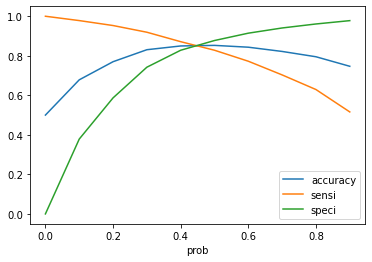

In [433]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [434]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.060637,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.083537,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.407605,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.078673,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.192754,0,1,1,0,0,0,0,0,0,0,0,0


In [435]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[18540,  3507],
       [ 3014, 19033]], dtype=int64)

In [436]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [437]:
# Sensitivity 0r #Precision 
TP/float(TP+FP)


0.8444099378881987

In [438]:
# Specificity
TN / float(TN+FP)


0.8409307388760375

In [439]:
#Recall
TP / float(TP+FN)

0.8632920578763551

In [440]:
# Accuracy 
(TP+TN)/(TP+TN+FP+FN)

0.8521113983761963

# DECISION TREE 

In [198]:
from sklearn.tree import DecisionTreeClassifier

In [442]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=5)

In [443]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      5513
           1       0.36      0.78      0.49       488

    accuracy                           0.87      6001
   macro avg       0.67      0.83      0.71      6001
weighted avg       0.93      0.87      0.89      6001



In [444]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[4828  685]
 [ 107  381]]
0.8680219963339444


In [445]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [446]:
scores = tree.cv_results_
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.085787,0.003316,0.003599,0.000496,1,{'max_depth': 1},0.933542,0.928333,0.932083,0.930833,0.933542,0.931667,0.001950,9,0.931250,0.932552,0.931615,0.931927,0.931302,0.931729,0.000478
1,0.154797,0.002493,0.003591,0.000475,2,{'max_depth': 2},0.945625,0.942708,0.943750,0.942083,0.942500,0.943333,0.001271,1,0.942917,0.943646,0.943333,0.943750,0.943646,0.943458,0.000305
2,0.224656,0.003174,0.004169,0.000393,3,{'max_depth': 3},0.945417,0.942917,0.943750,0.942083,0.942292,0.943292,0.001210,2,0.943073,0.943698,0.943333,0.943854,0.943906,0.943573,0.000320
3,0.289597,0.003419,0.003785,0.000398,4,{'max_depth': 4},0.944167,0.941667,0.945833,0.941667,0.940625,0.942792,0.001917,3,0.944688,0.945312,0.944375,0.945052,0.944740,0.944833,0.000322
4,0.363673,0.013701,0.004179,0.000744,5,{'max_depth': 5},0.941875,0.943542,0.941875,0.938542,0.942292,0.941625,0.001658,4,0.946719,0.946302,0.947083,0.946719,0.947812,0.946927,0.000507


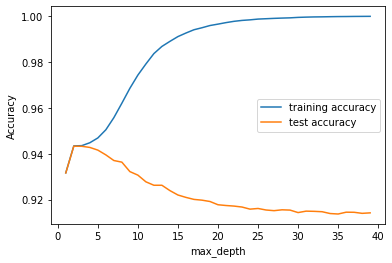

In [447]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [448]:
# GridSearchCV to find optimal min_samples_leafe
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [449]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.202377,0.055716,0.004993,0.000631,5,{'min_samples_leaf': 5},0.923750,0.923125,0.935000,0.918333,0.923542,0.924750,0.005502,10,0.973021,0.973177,0.973281,0.974375,0.973594,0.973490,0.000481
1,0.989143,0.049112,0.004375,0.000487,25,{'min_samples_leaf': 25},0.941667,0.938542,0.939792,0.935000,0.935833,0.938167,0.002470,9,0.951302,0.951615,0.951510,0.951979,0.951823,0.951646,0.000237
2,0.852316,0.010772,0.004192,0.000409,45,{'min_samples_leaf': 45},0.939792,0.940000,0.941458,0.942083,0.938125,0.940292,0.001386,8,0.947656,0.948229,0.949010,0.947760,0.947656,0.948063,0.000519
3,0.757182,0.021143,0.003982,0.000015,65,{'min_samples_leaf': 65},0.943125,0.942083,0.945208,0.942083,0.940208,0.942542,0.001632,6,0.946719,0.947344,0.945937,0.946719,0.946302,0.946604,0.000471
4,0.701115,0.032216,0.004188,0.000400,85,{'min_samples_leaf': 85},0.944167,0.944583,0.945417,0.940833,0.938750,0.942750,0.002536,5,0.944948,0.946406,0.945312,0.945521,0.945365,0.945510,0.000486


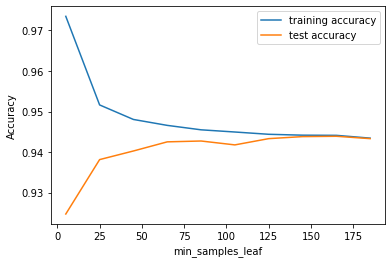

In [450]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [451]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [452]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.309126,0.071493,0.004777,0.000730,5,{'min_samples_split': 5},0.913958,0.915208,0.920417,0.913125,0.917708,0.916083,0.002663,10,0.994167,0.994479,0.994479,0.994427,0.994531,0.994417,0.000129
1,1.277320,0.063289,0.003790,0.000381,25,{'min_samples_split': 25},0.922708,0.925208,0.930208,0.920000,0.926458,0.924917,0.003450,9,0.969375,0.972083,0.972604,0.971667,0.968802,0.970906,0.001524
2,1.262441,0.060120,0.004170,0.000392,45,{'min_samples_split': 45},0.930208,0.928333,0.934167,0.926458,0.926875,0.929208,0.002806,8,0.961458,0.963542,0.963073,0.963385,0.962500,0.962792,0.000756
3,1.260997,0.058164,0.003985,0.000010,65,{'min_samples_split': 65},0.932083,0.934583,0.933542,0.934792,0.931042,0.933208,0.001447,7,0.957240,0.958490,0.958646,0.957344,0.958802,0.958104,0.000672
4,1.249484,0.057035,0.004176,0.000390,85,{'min_samples_split': 85},0.932917,0.935417,0.936250,0.935000,0.930833,0.934083,0.001961,6,0.955833,0.956250,0.955625,0.954271,0.955313,0.955458,0.000667


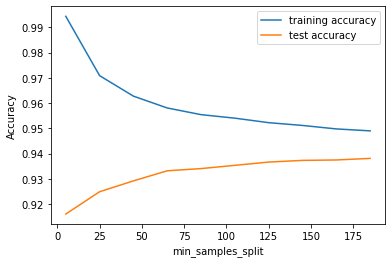

In [453]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [454]:
# After no of min_samples_split >125 we can see more convergence for accuracy of train and test 
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [455]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.495281,0.005388,0.003776,0.000392,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.945208,0.941042,0.943125,0.939583,0.943125,0.942417,0.001935,1
1,0.491095,0.003064,0.004180,0.000387,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.945208,0.941042,0.943125,0.939583,0.943125,0.942417,0.001935,1
2,0.481133,0.004013,0.003984,0.000014,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.944167,0.941667,0.943125,0.941458,0.941250,0.942333,0.001129,5
3,0.489672,0.013099,0.003979,0.000014,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.944167,0.941667,0.943125,0.941458,0.941250,0.942333,0.001129,5
4,0.796883,0.029499,0.004167,0.000390,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.937292,0.941667,0.937708,0.938958,0.940000,0.939125,0.001589,16
5,0.798036,0.023413,0.003990,0.000018,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.937292,0.942292,0.937708,0.938958,0.940000,0.939250,0.001795,15
6,0.746392,0.015849,0.003991,0.000004,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.944167,0.942917,0.942292,0.941458,0.941250,0.942417,0.001059,1
7,0.754618,0.019857,0.003791,0.000384,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.944167,0.942917,0.942292,0.941458,0.941250,0.942417,0.001059,1
8,0.362131,0.004662,0.003989,0.000001,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.942083,0.941458,0.942292,0.937708,0.942917,0.941292,0.001851,11
9,0.360063,0.005527,0.003962,0.000013,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.942083,0.941458,0.942292,0.937708,0.942917,0.941292,0.001851,11


In [456]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9424166666666667
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [457]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=150,
                                  min_samples_split=200)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=150, min_samples_split=200,
                       random_state=100)

Feature: 0 Score: 0.012 arpu_6
Feature: 1 Score: 0.009 arpu_7
Feature: 2 Score: 0.015 arpu_8
Feature: 3 Score: 0.011 onnet_mou_6
Feature: 4 Score: 0.01 onnet_mou_7
Feature: 5 Score: 0.021 onnet_mou_8
Feature: 6 Score: 0.009 offnet_mou_6
Feature: 7 Score: 0.006 offnet_mou_7
Feature: 8 Score: 0.007 offnet_mou_8
Feature: 9 Score: 0.01 total_og_mou_6
Feature: 10 Score: 0.009 total_og_mou_7
Feature: 11 Score: 0.011 total_og_mou_8
Feature: 12 Score: 0.012 total_ic_mou_6
Feature: 13 Score: 0.013 total_ic_mou_7
Feature: 14 Score: 0.304 total_ic_mou_8
Feature: 15 Score: 0.01 last_day_rch_amt_6
Feature: 16 Score: 0.002 last_day_rch_amt_7
Feature: 17 Score: 0.014 last_day_rch_amt_8
Feature: 18 Score: 0.002 arpu_3g_6
Feature: 19 Score: 0.001 arpu_3g_7
Feature: 20 Score: 0.002 arpu_3g_8
Feature: 21 Score: 0.006 arpu_2g_6
Feature: 22 Score: 0.003 arpu_2g_7
Feature: 23 Score: 0.003 arpu_2g_8
Feature: 24 Score: 0.001 night_pck_user_6
Feature: 25 Score: 0.0 night_pck_user_7
Feature: 26 Score: 0.001 nig

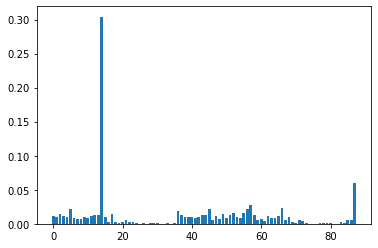

In [491]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define dataset
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
col_array = X_train.columns
# summarize feature importance
dict_cols = ['Feature','Importance']
impt_list1 = []
impt_list2 = []
for i,v in enumerate(importance):
    print('Feature:', i, 'Score:',np.round(v,3),col_array[i])
    impt_list1.append(col_array[i])
    impt_list2.append(np.round(v,3))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [497]:
Impt_df = pd.DataFrame(np.column_stack([impt_list1,impt_list2]),
                       columns=['Feature','Importance'])
Impt_df.head()

,Feature,Importance
0,arpu_6,0.012
1,arpu_7,0.009
2,arpu_8,0.015
3,onnet_mou_6,0.011
4,onnet_mou_7,0.01


In [499]:
Impt_df.sort_values('Importance',ascending=False)

,Feature,Importance
14,total_ic_mou_8,0.304
87,data_used_8,0.06
57,total_rech_amt_diff,0.028
66,duration_last_rech_8,0.023
45,roam_og_mou_diff,0.022
5,onnet_mou_8,0.021
56,total_rech_num_diff,0.021
36,aon,0.019
55,total_ic_mou_diff,0.016
52,std_ic_mou_diff,0.016


In [458]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5513
           1       0.79      0.39      0.52       488

    accuracy                           0.94      6001
   macro avg       0.87      0.69      0.74      6001
weighted avg       0.93      0.94      0.93      6001



# ADA BOOSTING

In [459]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

In [460]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [461]:
# base estimator: a weak learner with max_depth=2
# using it with the Balanced data set with SMOTE 
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train_sm, y_train_sm)
y_trainpred = shallow_tree.predict(X_train_sm)
metrics.accuracy_score(y_train_sm, y_trainpred)

0.8217217762053795

In [462]:
# adaboost with the tree as base estimator

estimators = list(range(1, 50, 3))

abc_scores = []
for n_est in estimators:
    ABClassifier = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABClassifier.fit(X_train_sm, y_train_sm)
    y_pred = ABClassifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)


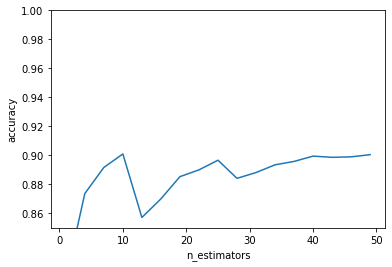

In [463]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.85, 1])
plt.show()

In [466]:
ABClassifier = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = 10)
    
ABClassifier.fit(X_train_sm, y_train_sm)
y_pred = ABClassifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[5076  437]
 [ 157  331]]


In [468]:
score

0.9010164972504583

In [467]:
# Importing classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      5513
           1       0.43      0.68      0.53       488

    accuracy                           0.90      6001
   macro avg       0.70      0.80      0.74      6001
weighted avg       0.93      0.90      0.91      6001



# Random Forests

In [469]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with 13 trees
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train_sm,y_train_sm)

RandomForestClassifier(n_estimators=10)

In [470]:
# Making predictions
predictions = rfc.predict(X_test)

# Importing classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5513
           1       0.55      0.60      0.57       488

    accuracy                           0.93      6001
   macro avg       0.76      0.78      0.77      6001
weighted avg       0.93      0.93      0.93      6001



In [471]:
## Grid Search to find optimal parameters

In [472]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5,10,15,20], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [473]:
# Fit the grid search to the data
grid_search.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': range(10, 20, 30),
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [5, 10, 15, 20]},
             verbose=1)

In [474]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9487458611148908 using {'max_depth': 20, 'max_features': 15, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


In [475]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=10,
                             n_estimators=10)

In [476]:
# fit
rfc.fit(X_train_sm,y_train_sm)

RandomForestClassifier(max_depth=12, max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=10)

In [477]:
# predict
predictions = rfc.predict(X_test)

In [478]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      5513
           1       0.48      0.73      0.58       488

    accuracy                           0.91      6001
   macro avg       0.73      0.83      0.77      6001
weighted avg       0.94      0.91      0.92      6001



# Conclusion
We ran the following models and have summarized our findings in the table below -
- Princple component Analysis and Regression
- Logistic Regression with RFE and VIF
- Decision Tree
- ADA Boosting with Decision Tree
- Random Forest


- Algorithm	                         Data Balanced 	      Precision 	  Accuracy 	  Recall     
Logistic Regression with PCA	     Yes with SMOTE	        15.31	        0.62	   83  
Logistic Regression with VIF and RFE 	Yes with SMOTE	0.84	0.85	0.86
Decision Tree	No 	0.87	0.94	0.69
Decision Tree with Adaboost	Yes with SMOTE	0.7	0.9	0.8
Random Forests 	Yes with SMOTE	0.73	0.91	0.83



We see that almost on all models the values are coming very similar to each other and more often than not there is a trade off between precision and recall
Since both the metrics are important, we feel that going ahead with Random forests

In [479]:
result = pd.read_excel('result.xlsx')

In [480]:
result

,Algorithm,Data Balanced,Precision,Accuracy,Recall
0,Logistic Regression with PCA,Yes with SMOTE,15.31,0.62,83.00
1,Logistic Regression with VIF and RFE,Yes with SMOTE,0.84,0.85,0.86
2,Decision Tree,No,0.87,0.94,0.69
3,Decision Tree with Adaboost,Yes with SMOTE,0.70,0.90,0.80
4,Random Forests,Yes with SMOTE,0.73,0.91,0.83


In [481]:
# Since we have tradeoffs in all the algorithm, i think Random forest performs well with good 
#accuracy and recall along with Logistic regression with VIF and RFE

# TOP 5 Features are 

	Feature	Importance
14	total_ic_mou_8	0.304  
87	data_used_8	0.06  
57	total_rech_amt_diff	0.028  
66	duration_last_rech_8	0.023  
45	roam_og_mou_diff	0.022  
5	onnet_mou_8	0.021  
56	total_rech_num_diff	0.021  
36	aon	0.019  